<a href="https://colab.research.google.com/github/ManasNM/Online_retail_customer_segmentation/blob/main/Manas_Nayan_Mukherjee_Capstone_Project_4_Online_Retail_Customer_Segmentation_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
#imorting important libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

# setting max display column limit to 30
pd.set_option("display.max_columns", 30)

# #set style
# # plt.style.use('seaborn')
# sns.set()


# # setting font weight,label weight,title weight to bold and setting title size,label size,fontsize.
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
# plt.rcParams["axes.titlesize"] = 25
# plt.rcParams["axes.titleweight"] = 'bold'
# plt.rcParams['xtick.labelsize']=15
# plt.rcParams['ytick.labelsize']=15
# plt.rcParams["axes.labelsize"] = 20
# plt.rcParams["legend.fontsize"] = 15
# plt.rcParams["legend.title_fontsize"] = 15

import warnings
warnings.filterwarnings('ignore')
from numpy import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path='/content/Manas_Online Retail.csv'

In [ ]:
# Read The Datset "Online Retail"

# The DatFile sometime wont readable due to its containt for encoding do "encoding = ISO-8859-1"

# Use Panda Library To read The CSV file

# .head() helps to read top 5 record of dataset

retail_df=pd.read_csv(file_path,sep=",",encoding="ISO-8859-1")
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom

In [ ]:
# shape of dataset
retail_df.shape

(443793, 8)

# **Data Wrangling:**

In [ ]:
# Checking the datatypes and null values in dataset
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443793 entries, 0 to 443792
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    443793 non-null  object 
 1   StockCode    443793 non-null  object 
 2   Description  442422 non-null  object 
 3   Quantity     443793 non-null  int64  
 4   InvoiceDate  443793 non-null  object 
 5   UnitPrice    443793 non-null  float64
 6   CustomerID   333963 non-null  float64
 7   Country      443793 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.1+ MB


### **Observations**
* ***Datatype of InvoiceDate is object need to convert it into datatime.***
* ***If InvoiceNo starts with C means it's a cancellation. We need to drop this entries.***
* ***There are null values in CustomerID and Description.***

In [ ]:
# Let's check the null values count.
retail_df.isnull().sum().sort_values(ascending=False)

CustomerID     109830
Description      1371
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

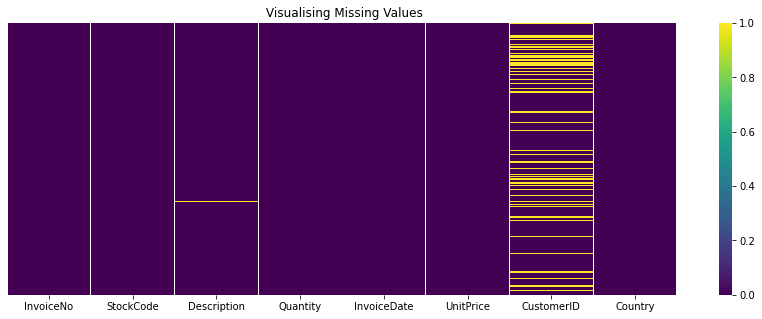

In [ ]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(15,5))
sns.heatmap(retail_df.isnull(),cmap='viridis',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")
plt.show()

## **Observations**
### ***Missing values in CustomerID and Description columns.***
### ***CustomerID is our identification feature so if its missing means other wont help us in analysis***
### ***Dropping that all missing datapoints***

In [ ]:
retail_df.dropna(inplace=True)

In [ ]:
retail_df.shape

(333963, 8)

## ***Our data got reduced.So we have 8 featurs and 406829 datapoints***

In [ ]:
retail_df.describe()

Quantity      UnitPrice     CustomerID
count  333963.000000  333963.000000  333963.000000
mean       12.446912       3.568066   15281.483823
std       188.059436      76.178953    1712.374912
min    -74215.000000       0.000000   12346.000000
25%         2.000000       1.250000   13908.000000
50%         6.000000       1.950000   15152.000000
75%        12.000000       3.750000   16779.000000
max     74215.000000   38970.000000   18287.000000

* ***Here we can see that min value for Quantity column is negative.***
* ***UnitPrice has 0 as min value***
* ***Need to Explore these columns***

### Dataframe have negative valiues in quantity.
### Here we observed that Invoice number starting with C has negative values and as per description of the data those are cancelations. so we need to drop this entries.


In [ ]:
retail_df[retail_df['Quantity']<0]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
441968   C574658     22662       LUNCH BAG DOLLY GIRL DESIGN        -1   
441969   C574658     22383            LUNCH BAG SUKI DESIGN         -1   
441970   C574658     22534     MAGIC DRAWING SLATE SPACEBOY         -2   
441971   C574658     22197                    POPCORN HOLDER        -3   
441972   C574658     21155             RED RETROSPOT PEG BAG        -1   

             InvoiceDate  UnitPrice  CustomerID         Country  
141     01-12-2010 09:41      27.50     14527.0  United Kingdom  
154     01-12-2010 09:49       4.65     15311.0  United Kingdom  
235     01-12-2010 10:24       1.65     17548.0  United Kingdom  
236     01-12-2010 10:24       0.29     17548.0  United Kingdom  
237     01-12-2010 10:24       0.29     17548.0  United Kingdom  
...                  ...        ...         ...             ...  
441968  06-11-2011 11:44       1.65     15426.0  United Kingdom  
441969  06-11-2011 11:44       1.65     15426.0  United Kingdom  
441970  06-11-2011 11:44       0.42     15426.0  United Kingdom  
441971  06-11-2011 11:44       0.85     15426.0  United Kingdom  
441972  06-11-2011 11:44       2.55     15426.0  United Kingdom  

[7702 rows x 8 columns]

In [ ]:
# changing the datatype to str
retail_df['InvoiceNo'] = retail_df['InvoiceNo'].astype('str')

In [ ]:
# also If InvoiceNo starts with C means it's a cancellation. We need to drop this entries.
retail_df=retail_df[~retail_df['InvoiceNo'].str.contains('C')]

In [ ]:
# Checking how many values are present for unitprice==0
# almost 40 values are present so will drop this values
len(retail_df[retail_df['UnitPrice']==0])

30

In [ ]:
# taking unitprice values greater than 0.
retail_df=retail_df[retail_df['UnitPrice']>0]
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom

In [ ]:
retail_df.describe()

Quantity      UnitPrice     CustomerID
count  326231.000000  326231.000000  326231.000000
mean       13.292934       3.173345   15288.374992
std       137.479269      23.658279    1712.186115
min         1.000000       0.001000   12346.000000
25%         2.000000       1.250000   13927.000000
50%         6.000000       1.950000   15159.000000
75%        12.000000       3.750000   16788.000000
max     74215.000000    8142.750000   18287.000000

In [ ]:
retail_df.shape

(326231, 8)

# **Feature Engineering**

In [ ]:
# Converting InvoiceDate to datetime. InvoiceDate is in format of 01-12-2010 08:26.
retail_df["InvoiceDate"] = pd.to_datetime(retail_df["InvoiceDate"], format="%d-%m-%Y %H:%M")

In [ ]:
retail_df["year"] = retail_df["InvoiceDate"].apply(lambda x: x.year)
retail_df["month_num"] = retail_df["InvoiceDate"].apply(lambda x: x.month)
retail_df["day_num"] = retail_df["InvoiceDate"].apply(lambda x: x.day)
retail_df["hour"] = retail_df["InvoiceDate"].apply(lambda x: x.hour)
retail_df["minute"] = retail_df["InvoiceDate"].apply(lambda x: x.minute)

In [ ]:
# extracting month from the Invoice date
retail_df['Month']=retail_df['InvoiceDate'].dt.month_name()

In [ ]:
# extracting day from the Invoice date
retail_df['Day']=retail_df['InvoiceDate'].dt.day_name()

In [ ]:
retail_df['TotalAmount']=retail_df['Quantity']*retail_df['UnitPrice']

In [ ]:
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  year  month_num  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010         12   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010         12   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   

   day_num  hour  minute     Month        Day  TotalAmount  
0        1     8      26  December  Wednesday        15.30  
1        1     8      26  December  Wednesday        20.34  
2        1     8      26  December  Wednesday        22.00  
3        1     8      26  December  Wednesday        20.34  
4        1     8      26  December  Wednesday        20.34

# **EDA(Exploratory Data Analysis)**

In [ ]:
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month_num', 'day_num',
       'hour', 'minute', 'Month', 'Day', 'TotalAmount'],
      dtype='object')

In [ ]:
top_10_product=retail_df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'}).head(10)
top_10_product

Product_name  Count
0  WHITE HANGING HEART T-LIGHT HOLDER   1775
1            REGENCY CAKESTAND 3 TIER   1533
2             JUMBO BAG RED RETROSPOT   1394
3                       PARTY BUNTING   1311
4       ASSORTED COLOUR BIRD ORNAMENT   1197
5             LUNCH BAG RED RETROSPOT   1164
6   SET OF 3 CAKE TINS PANTRY DESIGN    1035
7     PACK OF 72 RETROSPOT CAKE CASES    956
8             LUNCH BAG  BLACK SKULL.    939
9                      SPOTTY BUNTING    912

## ***Top 10 items in terms of description(Name)***

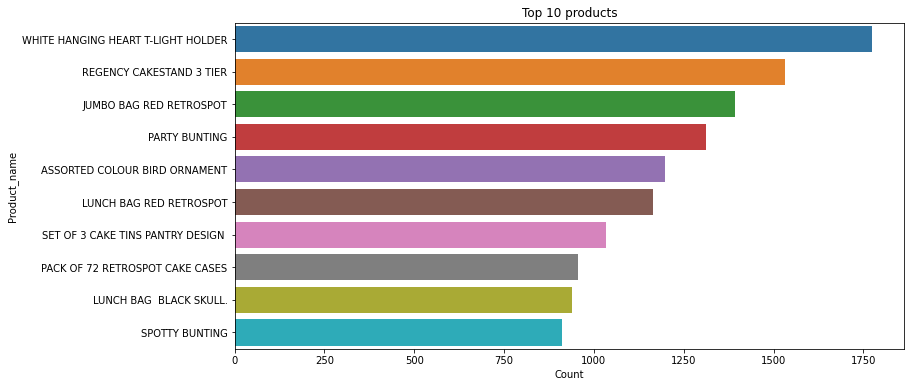

In [ ]:
# top 10 product in terms of description
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_product['Count'],y=top_10_product['Product_name'])
plt.title('Top 10 products')
plt.show()

### **Observations**
* ***WHITE HANGING HEART T-LIGHT HOLDER	is the highest selling product almost 2018 units were sold***
* ***REGENCY CAKESTAND 3 TIER is the 2nd highest selling product almost 1723 units were sold***

## ***Bottom 10 items in terms of description(Name)***

In [ ]:
bottom_10_product=retail_df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'}).tail(10)
bottom_10_product

Product_name  Count
3809             2 DAISIES HAIR COMB      1
3810                 DAISY HAIR COMB      1
3811   PURPLE ENAMEL FLOWER HAIR TIE      1
3812            PINK DAISY BAG CHARM      1
3813   CLASSIC DIAMANTE EARRINGS JET      1
3814    DROP DIAMANTE EARRINGS GREEN      1
3815      BLACK 3 BEAD DROP EARRINGS      1
3816       TEA TIME BREAKFAST BASKET      1
3817     BLUE PAINTED KASHMIRI CHAIR      1
3818  GLASS BEAD HOOP EARRINGS BLACK      1

Text(0.5, 1.0, 'Bottom 10 products')

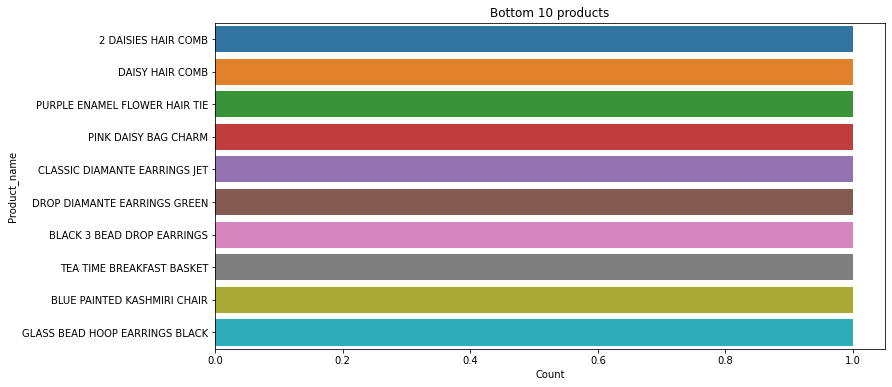

In [ ]:
# bottom 10 product in terms of description
plt.figure(figsize=(12,6))
sns.barplot(x=bottom_10_product['Count'],y=bottom_10_product['Product_name'])
plt.title('Bottom 10 products')

## ***Top 10 items in terms of StockCode.***

In [ ]:
top_10_StockCodes=retail_df['StockCode'].value_counts().reset_index().rename(columns={'index':'StockCode','StockCode':'Count'}).head(10)
top_10_StockCodes

StockCode  Count
0    85123A   1775
1     22423   1533
2    85099B   1394
3     47566   1311
4     84879   1197
5     20725   1165
6     22720   1035
7     21212    956
8     22383    955
9     20727    939

Text(0.5, 1.0, 'Top 10 products in terms of Stock Code')

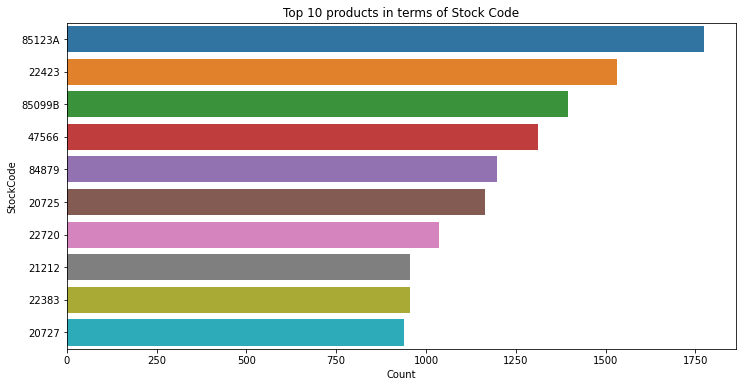

In [ ]:
# top 10 product in terms of StcokCode
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_StockCodes['Count'],y=top_10_StockCodes['StockCode'])
plt.title('Top 10 products in terms of Stock Code')

# **Observations**
* ***StockCode-85123Ais the first highest selling product.***
* ***StockCode-22423 is the 2nd highest selling product.***

In [ ]:
top_10_customers=retail_df['CustomerID'].value_counts().reset_index().rename(columns={'index':'CustomerID','CustomerID':'Products_purchasing_Count'}).head(10)
top_10_customers

CustomerID  Products_purchasing_Count
0     17841.0                       6179
1     14911.0                       4533
2     14096.0                       2688
3     12748.0                       2678
4     14606.0                       2340
5     15311.0                       2104
6     14646.0                       1861
7     13089.0                       1609
8     14298.0                       1592
9     13263.0                       1498

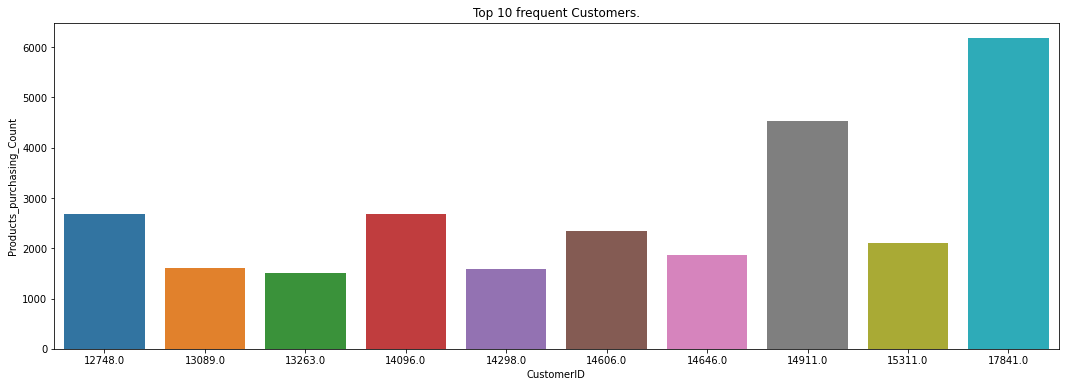

In [ ]:
# Top 10 frequent Customers
plt.figure(figsize=(18,6))
sns.barplot(x=top_10_customers['CustomerID'],y=top_10_customers['Products_purchasing_Count'].head(10))
plt.title('Top 10 frequent Customers.')
plt.show()

# **Observation**
* ***CustomerID- 17841 had purchased highest number of products***
* ***CustomerID-14911 is the 2nd higest customer who purchased the most the products***


In [ ]:
top_5_countries=retail_df['Country'].value_counts().reset_index().rename(columns={'index':'Country','Country':'Customer_count'})
top_5_countries

Country  Customer_count
0         United Kingdom          289024
1                Germany            7702
2                 France            6769
3                   EIRE            6002
4                  Spain            2197
5            Netherlands            2118
6                Belgium            1766
7            Switzerland            1616
8               Portugal            1228
9              Australia            1147
10                Norway             847
11       Channel Islands             734
12               Finland             612
13                 Italy             576
14                Cyprus             514
15                Sweden             413
16                Poland             330
17               Austria             321
18                 Japan             289
19               Denmark             286
20                Israel             248
21           Unspecified             244
22             Singapore             222
23               Iceland             171
24                Canada             151
25                   USA             147
26                Greece             109
27                 Malta             100
28  United Arab Emirates              68
29    European Community              60
30                   RSA              57
31               Lebanon              45
32             Lithuania              35
33                Brazil              32
34        Czech Republic              25
35               Bahrain              17
36          Saudi Arabia               9

Text(0.5, 1.0, 'Top 5 Countries based on highest number of customers')

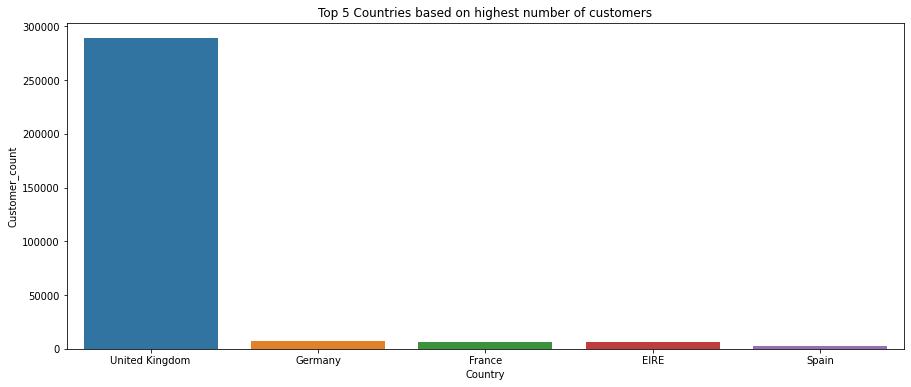

In [ ]:
# top 5 countries where max sell happens.
plt.figure(figsize=(15,6))
sns.barplot(x=top_5_countries['Country'].head(5),y=top_5_countries['Customer_count'].head(5))
plt.title('Top 5 Countries based on highest number of customers')

# **Observation**
* ***UK has highest number of customers***
* ***Germany,France and IreLand has almost equal number of customers***

Text(0.5, 1.0, 'Top 5 Countries based on least number of customers ')

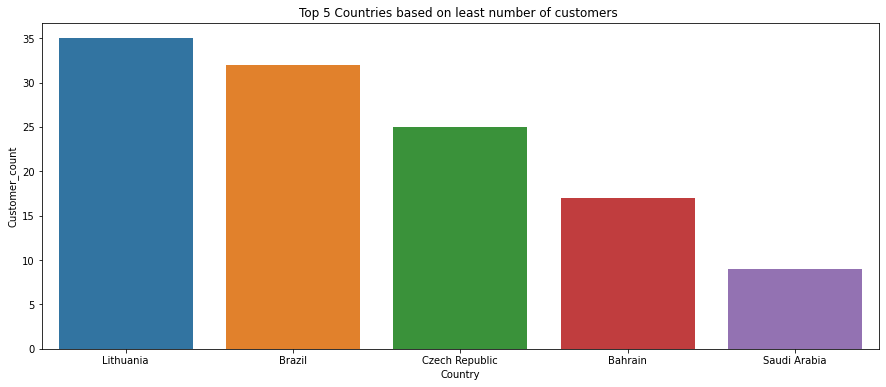

In [ ]:
# top 5 countries where max sell happens.
plt.figure(figsize=(15,6))
sns.barplot(x=top_5_countries['Country'].tail(5),y=top_5_countries['Customer_count'].tail(5))
plt.title('Top 5 Countries based on least number of customers ')

# **Observations**
* ***There are very less customers from Saudi Arabia***
* ***Bahrain is the 2nd Country having least number of customers***

In [ ]:
sales_in_month=retail_df['Month'].value_counts().reset_index().rename(columns={'index':'Month','Month':'Sales_count'})
sales_in_month

Month  Sales_count
0     October        49554
1   September        40028
2         May        28320
3        June        27185
4       March        27175
5      August        27007
6        July        26825
7    December        26157
8       April        22642
9     January        21229
10   February        19927
11   November        10182

Text(0.5, 1.0, 'Sales count in different Months ')

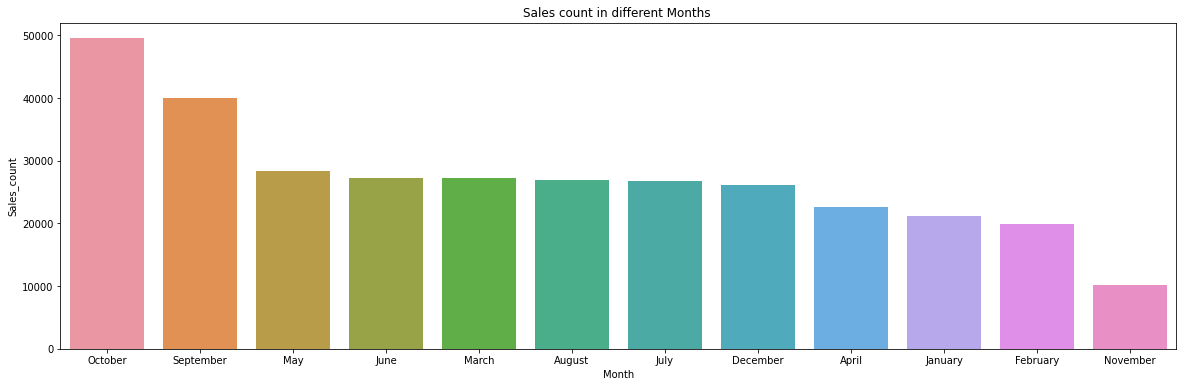

In [ ]:
# Sales count in different months.
plt.figure(figsize=(20,6))
sns.barplot(x=sales_in_month['Month'],y=sales_in_month['Sales_count'])
plt.title('Sales count in different Months ')

##**Observations**
* ***Most of the sale happened in Novmenber month.***
* ***February Month had least sales.***

In [ ]:
sales_on_day_basis=retail_df['Day'].value_counts().reset_index().rename(columns={'index':'Day',"Day":'Sale_count'})
sales_on_day_basis

Day  Sale_count
0   Thursday       66806
1  Wednesday       56405
2    Tuesday       53889
3     Monday       51777
4     Sunday       51386
5     Friday       45968

Text(0.5, 1.0, 'Sales count on different Days ')

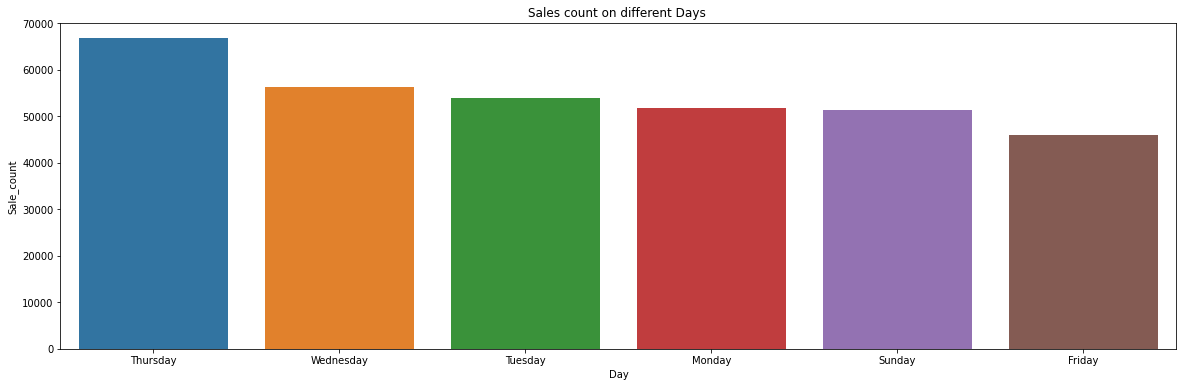

In [ ]:
# Sales count on different days.
plt.figure(figsize=(20,6))
sns.barplot(x=sales_on_day_basis['Day'],y=sales_on_day_basis['Sale_count'])
plt.title('Sales count on different Days ')

## **Observation**
* ***Sales On Thursdays are very high.***
* ***Sales On Fridays are very less***

In [ ]:
retail_df['hour'].unique()

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17,  7, 18, 19, 20,  6])

In [ ]:
def time(time):
  if (time==6 or time==7 or time==8 or time==9 or time==10 or time==11) :
    return'Morning'
  elif (time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'   

In [ ]:
retail_df['Day_time_type']=retail_df['hour'].apply(time)

In [ ]:
sales_timing=retail_df['Day_time_type'].value_counts().reset_index().rename(columns={'index':'Day_time_type','Day_time_type':'Sales_count'})
sales_timing

Day_time_type  Sales_count
0     Afternoon       221161
1       Morning        99369
2       Evening         5701

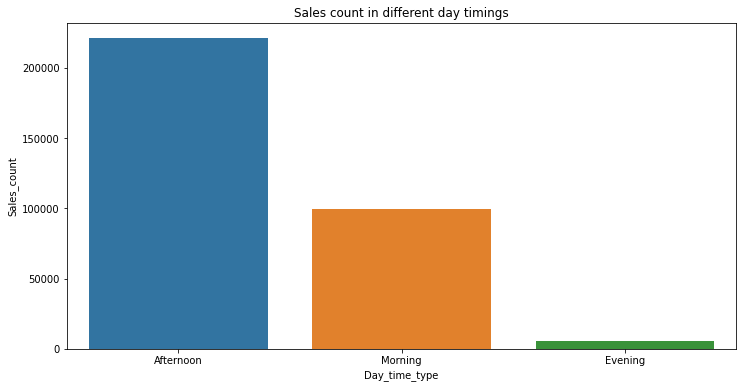

In [ ]:
# Sales count on different days.
plt.figure(figsize=(12,6))
sns.barplot(x=sales_timing['Day_time_type'],y=sales_timing['Sales_count'])
plt.title('Sales count in different day timings')
plt.show()

## **Observations**

* ***Most of the sales happens in the afternoon.***
* ***Least sales happens in the evening.***

In [ ]:
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month_num', 'day_num',
       'hour', 'minute', 'Month', 'Day', 'TotalAmount', 'Day_time_type'],
      dtype='object')

In [ ]:
avg_amount=retail_df.groupby('CustomerID')['TotalAmount'].mean().reset_index().rename(columns={'TotalAmount':'Avg_amount_per_customer'}).sort_values('Avg_amount_per_customer',ascending=False)

In [ ]:
avg_amount

CustomerID  Avg_amount_per_customer
0        12346.0             77183.600000
1882     15098.0             13305.500000
2336     15749.0              4453.430000
554      13135.0              3096.000000
3744     17846.0              2033.100000
...          ...                      ...
648      13271.0                 2.264375
926      13684.0                 2.241000
3728     17816.0                 2.150588
2169     15503.0                 2.101286
2814     16446.0                 1.450000

[4040 rows x 2 columns]

Text(0.5, 1.0, 'Average amount spent by each Customer')

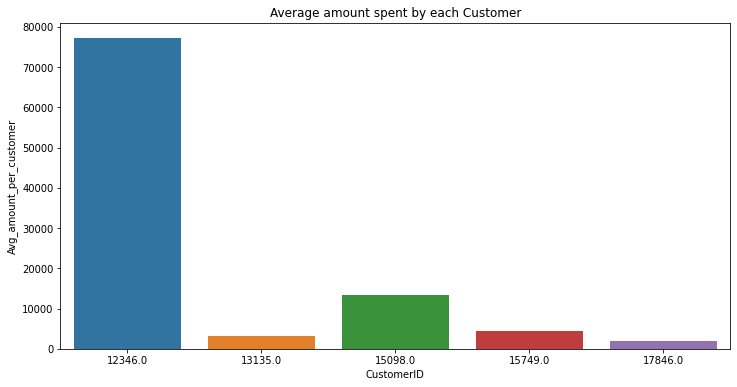

In [ ]:
# Sales count on different days.
plt.figure(figsize=(12,6))
sns.barplot(x=avg_amount['CustomerID'].head(5),y=avg_amount['Avg_amount_per_customer'].head(15))
plt.title('Average amount spent by each Customer')

### **Observation**
* ***77183 (Dollars)is the highest average amount spent by the CustomerID-12346***
* ***56157 (Dollars) is the 2nd  highest average amount spent by the CustomerID-16446***

# **ModelBuilding**

## **RFM Model Analysis:**

#**What is RFM?**

* ***RFM is a method used to analyze customer value. RFM stands for RECENCY, Frequency, and Monetary.***

* ***RECENCY: How recently did the customer visit our website or how recently did a customer purchase?***

* ***Frequency: How often do they visit or how often do they purchase?***

* ***Monetary: How much revenue we get from their visit or how much do they spend when they purchase?***

# **Why it is Needed?**
***RFM Analysis is a marketing framework that is used to understand and analyze customer behaviour based on the above three factors RECENCY, Frequency, and Monetary.***

***The RFM Analysis will help the businesses to segment their customer base into different homogenous groups so that they can engage with each group with different targeted marketing strategies.***

In [ ]:
rfm_dataframe=retail_df.copy()

In [ ]:
rfm_dataframe.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  year  month_num  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010         12   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010         12   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   
5 2010-12-01 08:26:00       7.65     17850.0  United Kingdom  2010         12   
6 2010-12-01 08:26:00       4.25     17850.0  United Kingdom  2010         12   
7 2010-12-01 08:28:00       1.85     17850.0  United Kingdom  2010         12   
8 2010-12-01 08:28:00       1.85     17850.0  United Kingdom  2010         12   
9 2010-12-01 08:34:00       1.69     13047.0  United Kingdom  2010         12   

   day_num  hour  minute     Month        Day  TotalAmount Day_time_type  
0        1     8      26  December  Wednesday        15.30       Morning  
1        1     8      26  December  Wednesday        20.34       Morning  
2        1     8      26  December  Wednesday        22.00       Morning  
3        1     8      26  December  Wednesday        20.34       Morning  
4        1     8      26  December  Wednesday        20.34       Morning  
5        1     8      26  December  Wednesday        15.30       Morning  
6        1     8      26  December  Wednesday        25.50       Morning  
7        1     8      28  December  Wednesday        11.10       Morning  
8        1     8      28  December  Wednesday        11.10       Morning  
9        1     8      34  December  Wednesday        54.08       Morning

In [ ]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_dataframe = retail_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_dataframe['InvoiceDate'] = rfm_dataframe['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_dataframe.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_dataframe.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12347.0       39        171   4085.18
2     12348.0       75         31   1797.24
3     12350.0      310         17    334.40
4     12352.0       36         85   2506.04

In [ ]:
# Descriptive Stats= Recency
rfm_dataframe.Recency.describe()

count    4040.000000
mean      126.289356
std        94.548686
min        33.000000
25%        52.000000
50%        84.500000
75%       184.000000
max       373.000000
Name: Recency, dtype: float64

Text(0.5, 1.0, 'Distribution of Recency')

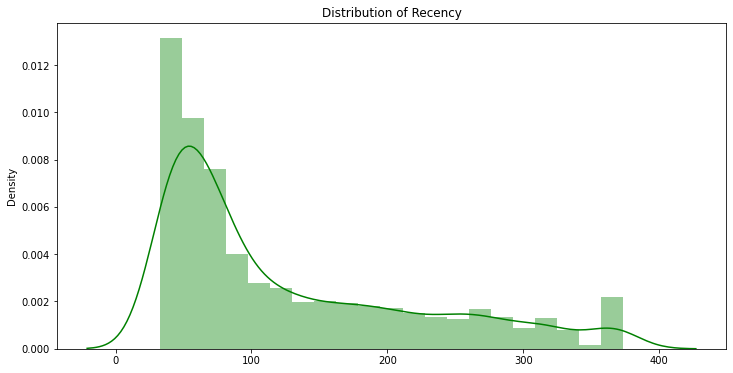

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(x=rfm_dataframe['Recency'],color="g")
plt.title('Distribution of Recency')

## ***Distribution of Recency is right skewed.***

In [ ]:
# Descriptive Stats= Frequency
rfm_dataframe['Frequency'].describe()

count    4040.000000
mean       80.750248
std       183.791102
min         1.000000
25%        16.000000
50%        37.000000
75%        89.000000
max      6179.000000
Name: Frequency, dtype: float64

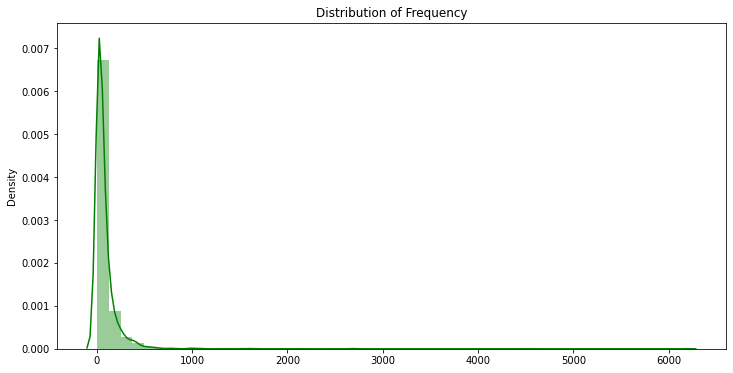

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(x=rfm_dataframe['Frequency'],color="g")
plt.title('Distribution of Frequency')
plt.show()

## ***Distribution of Monetary is highly right skewed.***

In [ ]:
# Split the data into four segment using Quantile
quantile = rfm_dataframe.quantile(q = [0.25,0.50,0.75])


In [ ]:
quantile = quantile.to_dict()

In [ ]:
quantile

{'Recency': {0.25: 52.0, 0.5: 84.5, 0.75: 184.0},
 'Frequency': {0.25: 16.0, 0.5: 37.0, 0.75: 89.0},
 'Monetary': {0.25: 292.7125, 0.5: 632.1700000000001, 0.75: 1534.53}}

In [ ]:
 #Converting quantiles to a dictionary, easier to use.
#quantiles = quantiles.to_dict()
#Functions to create R, F and M segments
# arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
# lower the recency, good for the company



def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1                               
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

        # arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
        # higher value of frequency and monetary lead to a good consumer. Here higher value = 1 in reverse way.
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
# # this code was for understanding the above code function
# if 18 <= quantile['Recency'][0.25]:
#   print(1)
# else:
#   print('Great')     

In [ ]:
# Calculating and adding R,F and M segments values columns in the existing dataset to show R,F,M segment values
rfm_dataframe["R"] = rfm_dataframe['Recency'].apply(RScoring,args=('Recency',quantile,))
rfm_dataframe["F"] = rfm_dataframe['Frequency'].apply(FnMScoring,args=('Frequency',quantile,))
rfm_dataframe["M"] = rfm_dataframe['Monetary'].apply(FnMScoring,args=('Monetary',quantile,))
rfm_dataframe.head()

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12346.0         325          1  77183.60  4  4  1
12347.0          39        171   4085.18  1  1  1
12348.0          75         31   1797.24  2  3  1
12350.0         310         17    334.40  4  3  3
12352.0          36         85   2506.04  1  2  1

In [ ]:
# Add a new column to combine RFM score
rfm_dataframe['RFM_Group'] = rfm_dataframe.R.map(str)+rfm_dataframe.F.map(str)+rfm_dataframe.M.map(str)

In [ ]:
#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_dataframe['RFM_Score'] = rfm_dataframe[['R', 'F', 'M']].sum(axis = 1)
rfm_dataframe.head()

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score
CustomerID                                                            
12346.0         325          1  77183.60  4  4  1       441          9
12347.0          39        171   4085.18  1  1  1       111          3
12348.0          75         31   1797.24  2  3  1       231          6
12350.0         310         17    334.40  4  3  3       433         10
12352.0          36         85   2506.04  1  2  1       121          4

In [ ]:
rfm_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4040 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4040 non-null   int64  
 1   Frequency  4040 non-null   int64  
 2   Monetary   4040 non-null   float64
 3   R          4040 non-null   int64  
 4   F          4040 non-null   int64  
 5   M          4040 non-null   int64  
 6   RFM_Group  4040 non-null   object 
 7   RFM_Score  4040 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 284.1+ KB


In [ ]:
rfm_dataframe['RFM_Score'].unique()

array([ 9,  3,  6, 10,  4, 12,  8, 11,  7,  5])

In [ ]:
# Assign Loyelty Level to each customer
Loyalty_Level = ['Platinaum','Gold','Silver','Bronz']

Score_cut = pd.qcut(rfm_dataframe['RFM_Score'],q = 4,labels=Loyalty_Level)
rfm_dataframe['RFM_Loyalty_Level'] = Score_cut.values
rfm_dataframe.reset_index().head()

CustomerID  Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
0     12346.0      325          1  77183.60  4  4  1       441          9   
1     12347.0       39        171   4085.18  1  1  1       111          3   
2     12348.0       75         31   1797.24  2  3  1       231          6   
3     12350.0      310         17    334.40  4  3  3       433         10   
4     12352.0       36         85   2506.04  1  2  1       121          4   

  RFM_Loyalty_Level  
0            Silver  
1         Platinaum  
2              Gold  
3            Silver  
4         Platinaum

In [ ]:
rfm_dataframe['RFM_Score'].unique()

array([ 9,  3,  6, 10,  4, 12,  8, 11,  7,  5])

In [ ]:
# Validate the data For RFM group = 111
rfm_dataframe[rfm_dataframe['RFM_Group'] == '111'].sort_values("Monetary",ascending = False).reset_index().head(10)

CustomerID  Recency  Frequency   Monetary  R  F  M RFM_Group  RFM_Score  \
0     18102.0       35        407  247885.68  1  1  1       111          3   
1     14646.0       37       1861  247589.50  1  1  1       111          3   
2     17450.0       36        283  174188.76  1  1  1       111          3   
3     12415.0       36        687  119559.13  1  1  1       111          3   
4     14911.0       38       4533  116172.46  1  1  1       111          3   
5     14156.0       49       1308  110626.95  1  1  1       111          3   
6     16029.0       38        242   81024.84  1  1  1       111          3   
7     17511.0       44        765   70160.84  1  1  1       111          3   
8     16684.0       35        245   60058.78  1  1  1       111          3   
9     13694.0       42        518   57069.24  1  1  1       111          3   

  RFM_Loyalty_Level  
0         Platinaum  
1         Platinaum  
2         Platinaum  
3         Platinaum  
4         Platinaum  
5         Platinaum  
6         Platinaum  
7         Platinaum  
8         Platinaum  
9         Platinaum

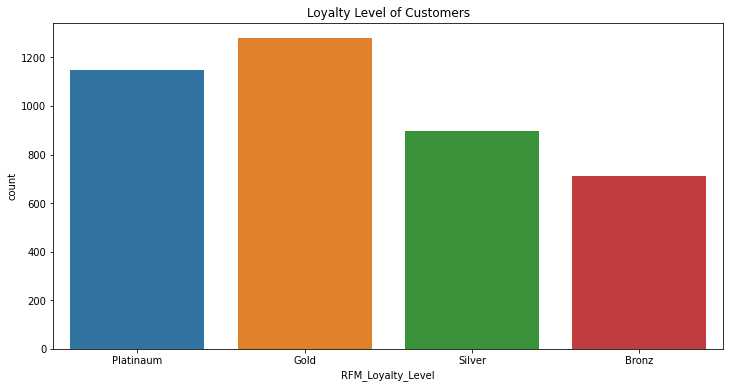

In [ ]:
# Plot the loyelty level
plt.figure(figsize=(12,6))
sns.countplot(rfm_dataframe['RFM_Loyalty_Level'])
plt.title('Loyalty Level of Customers')
plt.show()

In [ ]:
#Folowing table contains our target peoples
rfm_dataframe[rfm_dataframe['RFM_Loyalty_Level'] == 'Platinaum'].sort_values("Monetary",ascending = False).reset_index().head(10)

CustomerID  Recency  Frequency   Monetary  R  F  M RFM_Group  RFM_Score  \
0     18102.0       35        407  247885.68  1  1  1       111          3   
1     14646.0       37       1861  247589.50  1  1  1       111          3   
2     17450.0       36        283  174188.76  1  1  1       111          3   
3     12415.0       36        687  119559.13  1  1  1       111          3   
4     14911.0       38       4533  116172.46  1  1  1       111          3   
5     14156.0       49       1308  110626.95  1  1  1       111          3   
6     16029.0       38        242   81024.84  1  1  1       111          3   
7     17511.0       44        765   70160.84  1  1  1       111          3   
8     16684.0       35        245   60058.78  1  1  1       111          3   
9     13694.0       42        518   57069.24  1  1  1       111          3   

  RFM_Loyalty_Level  
0         Platinaum  
1         Platinaum  
2         Platinaum  
3         Platinaum  
4         Platinaum  
5         Platinaum  
6         Platinaum  
7         Platinaum  
8         Platinaum  
9         Platinaum

In [ ]:
segmentation_based_on_RFM=rfm_dataframe[['Recency','Frequency','Monetary','RFM_Loyalty_Level']]

In [ ]:
segmentation_based_on_RFM.groupby('RFM_Loyalty_Level').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max','count']
})

Recency            Frequency               Monetary  \
                         mean min  max        mean min   max         mean   
RFM_Loyalty_Level                                                           
Platinaum           56.654783  33  184  201.690435  19  6179  4837.844365   
Gold                99.025020  33  372   52.149335   1   365   986.848524   
Silver             160.880846  33  373   22.477728   1    88   535.627842   
Bronz              243.943899  85  373   10.382889   1    37   190.232609   

                                            
                      min        max count  
RFM_Loyalty_Level                           
Platinaum          341.28  247885.68  1150  
Gold                36.56   39916.50  1279  
Silver               6.20   77183.60   898  
Bronz                2.90     618.63   713

In [ ]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_dataframe['Recency'] = [handle_neg_n_zero(x) for x in rfm_dataframe.Recency]
rfm_dataframe['Monetary'] = [handle_neg_n_zero(x) for x in rfm_dataframe.Monetary]

In [ ]:
#Perform Log transformation to bring data into normal or near normal distribution
Log_rfm_df = rfm_dataframe[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

***Now let's Visualize the Distribution of Recency,Frequency and Monetary.***

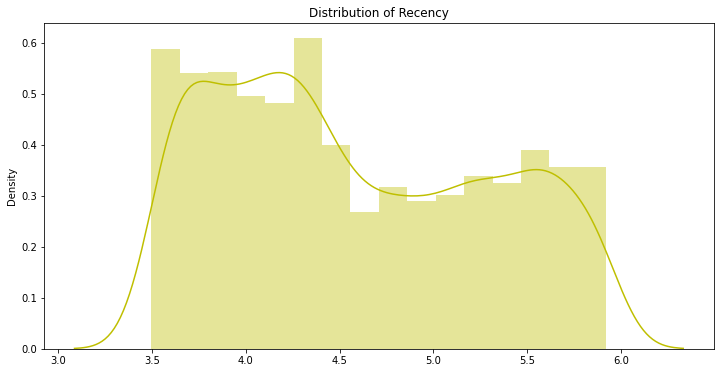

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(x=Log_rfm_df['Recency'],color="y")
plt.title('Distribution of Recency')
plt.show()

Text(0.5, 1.0, 'Distribution of Frequency')

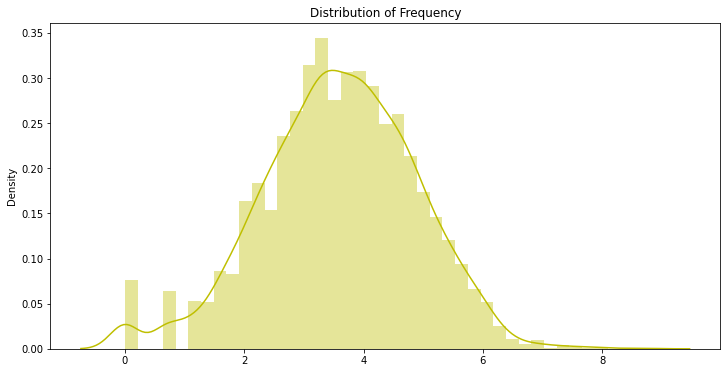

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(x=Log_rfm_df['Frequency'],color="y")
plt.title('Distribution of Frequency')

Text(0.5, 1.0, 'Distribution of Monetary')

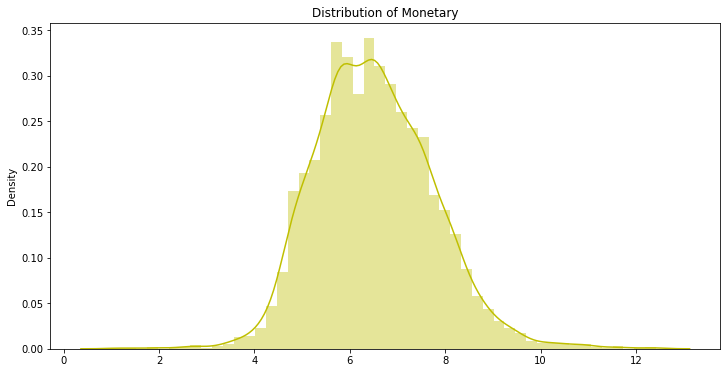

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(x=Log_rfm_df['Monetary'],color="y")
plt.title('Distribution of Monetary')

In [ ]:

rfm_dataframe['Recency_log'] = rfm_dataframe['Recency'].apply(math.log)
rfm_dataframe['Frequency_log'] = rfm_dataframe['Frequency'].apply(math.log)
rfm_dataframe['Monetary_log'] = rfm_dataframe['Monetary'].apply(math.log)

In [ ]:
rfm_dataframe

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12346.0         325          1  77183.60  4  4  1       441          9   
12347.0          39        171   4085.18  1  1  1       111          3   
12348.0          75         31   1797.24  2  3  1       231          6   
12350.0         310         17    334.40  4  3  3       433         10   
12352.0          36         85   2506.04  1  2  1       121          4   
...             ...        ...       ... .. .. ..       ...        ...   
18280.0         277         10    180.60  4  4  4       444         12   
18281.0         180          7     80.82  3  4  4       344         11   
18282.0         126          7    100.21  3  4  4       344         11   
18283.0          43        487   1235.32  1  1  2       112          4   
18287.0          42         70   1837.28  1  2  1       121          4   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetary_log  
CustomerID                                                              
12346.0               Silver     5.783825       0.000000     11.253942  
12347.0            Platinaum     3.663562       5.141664      8.315121  
12348.0                 Gold     4.317488       3.433987      7.494007  
12350.0               Silver     5.736572       2.833213      5.812338  
12352.0            Platinaum     3.583519       4.442651      7.826459  
...                      ...          ...            ...           ...  
18280.0                Bronz     5.624018       2.302585      5.196285  
18281.0                Bronz     5.192957       1.945910      4.392224  
18282.0                Bronz     4.836282       1.945910      4.607268  
18283.0            Platinaum     3.761200       6.188264      7.119085  
18287.0            Platinaum     3.737670       4.248495      7.516041  

[4040 rows x 12 columns]

# **1) K Means Clustering:**

In [ ]:
#Importing Libraries

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Before implementing the Kmeans Clustering alogorthm we need to decide the number of clusters to put inside algorithm as input. So we will be finding the minmum number of clusters required by using Elbow method.

## **Recency and Monetary.**

##***A)  Applying Elbow Method on Recency and Monetary.*** 

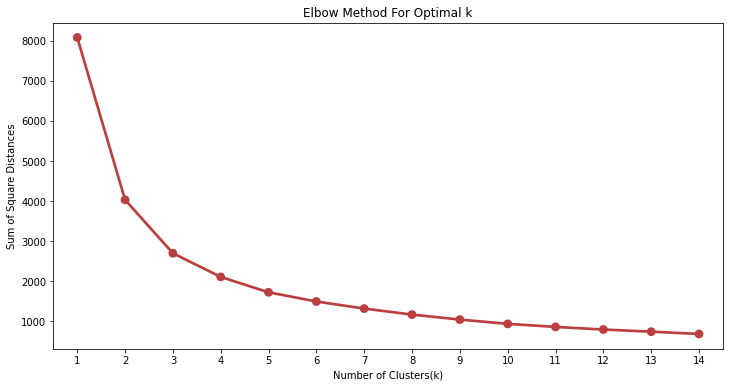

In [ ]:
# taking Recency and Monetory_log in list.
Recency_and_Monetary_feat=['Recency_log','Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#applying Elbow Method
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_


#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()), color="#bb3f3f")
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

##**Here we can see that Optimal value for cluster came out to be 2**

### ***Cross verifying with ElbowVisualizar***
The elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

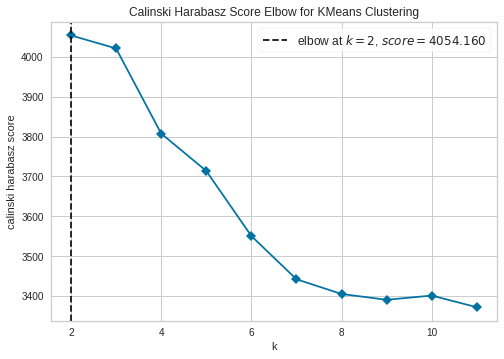

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## **Elbow Visulaizer also giving cluster=2**

##**Silhouette Score** ***(Validating Above optimal cluster value(i.e optimal_cluster=2)**

In [ ]:
# taking Recency and Monetory_log in list.
Recency_and_Monetary_feat=['Recency_log','Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.44589264530126216
For n_clusters = 3, silhouette score is 0.40385654384399483
For n_clusters = 4, silhouette score is 0.3861007418932401
For n_clusters = 5, silhouette score is 0.35894094474236476
For n_clusters = 6, silhouette score is 0.33540512908564624
For n_clusters = 7, silhouette score is 0.3401158836914426
For n_clusters = 8, silhouette score is 0.33201520783755706
For n_clusters = 9, silhouette score is 0.3329853179512917
For n_clusters = 10, silhouette score is 0.3417266210637639
For n_clusters = 11, silhouette score is 0.3336583256084082
For n_clusters = 12, silhouette score is 0.33825535890636926
For n_clusters = 13, silhouette score is 0.34226537248227906
For n_clusters = 14, silhouette score is 0.3424146629510692
For n_clusters = 15, silhouette score is 0.3435289318049049


***Here we can see the for n_cluster=2 silhouette score is good as compared to others.(if values is close to 1 means data points are clustered very well to respective clusters and distance of that datapoint is very far from the other cluster.)***

For n_clusters = 2 The average silhouette_score is : 0.44589264530126216
For n_clusters = 3 The average silhouette_score is : 0.40385654384399483
For n_clusters = 4 The average silhouette_score is : 0.3861007418932401
For n_clusters = 5 The average silhouette_score is : 0.35894094474236476
For n_clusters = 6 The average silhouette_score is : 0.33540512908564624
For n_clusters = 7 The average silhouette_score is : 0.3401158836914426
For n_clusters = 8 The average silhouette_score is : 0.33201520783755706
For n_clusters = 9 The average silhouette_score is : 0.3329853179512917
For n_clusters = 10 The average silhouette_score is : 0.3417266210637639


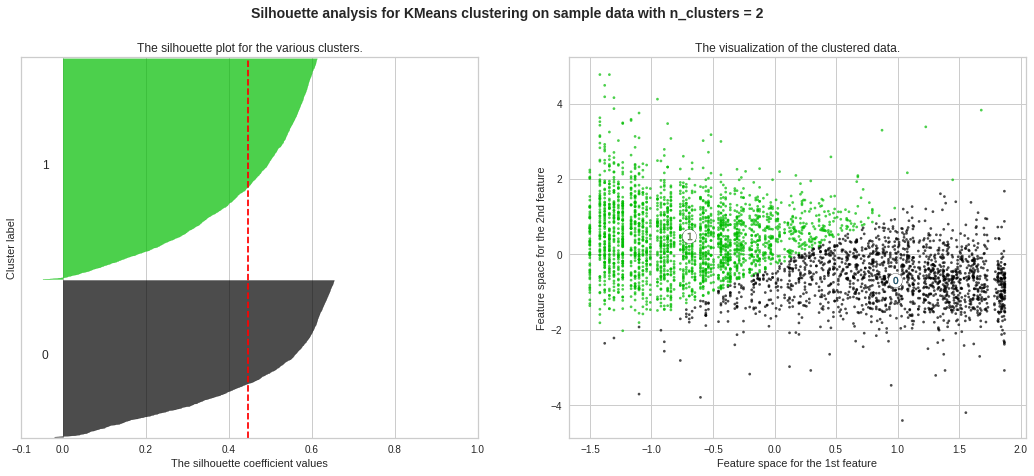

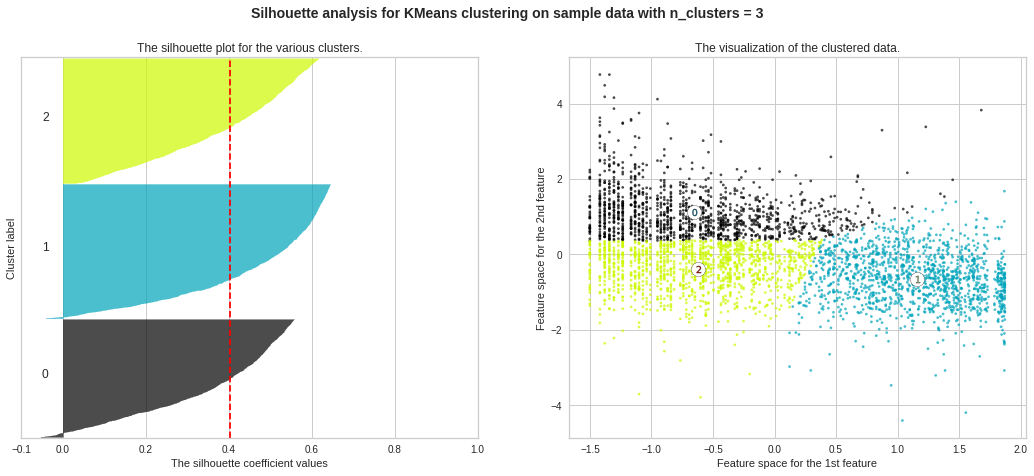

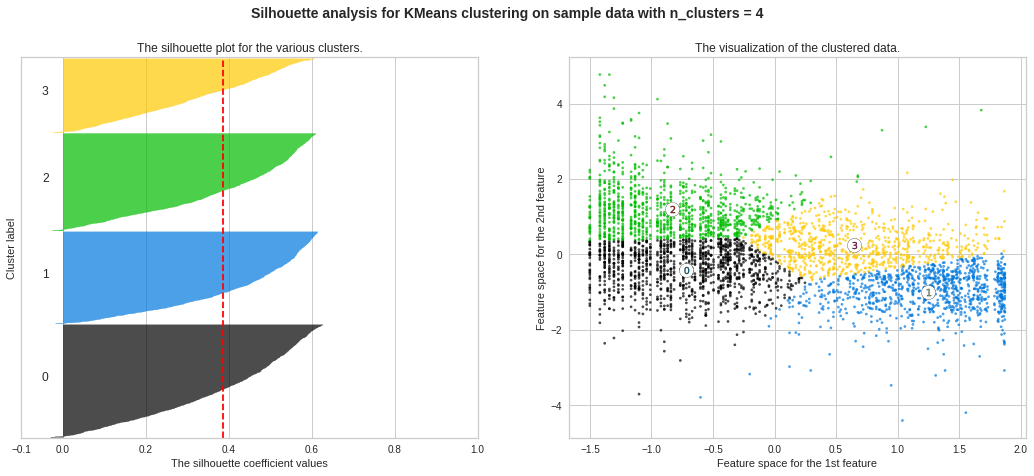

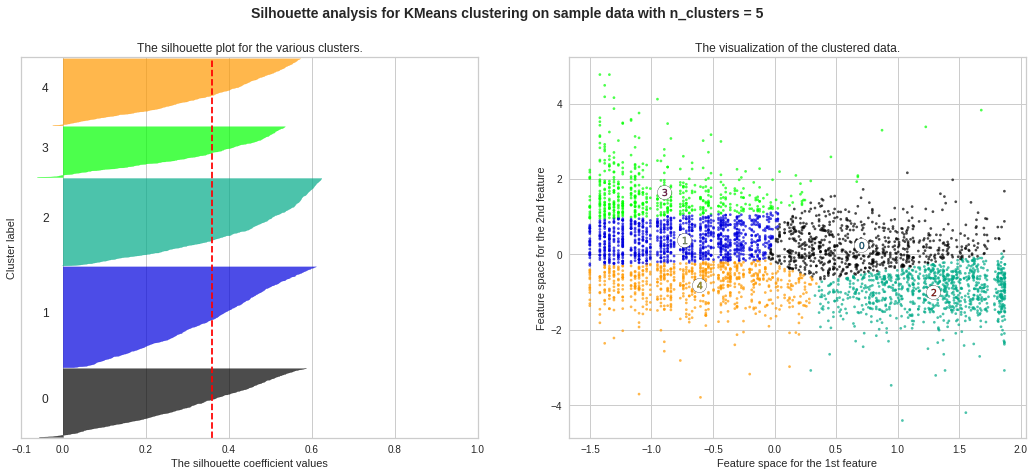

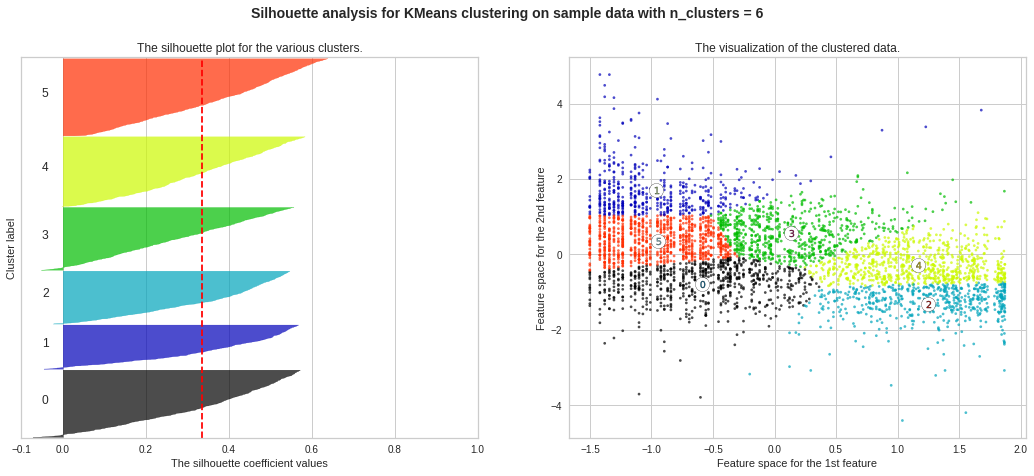

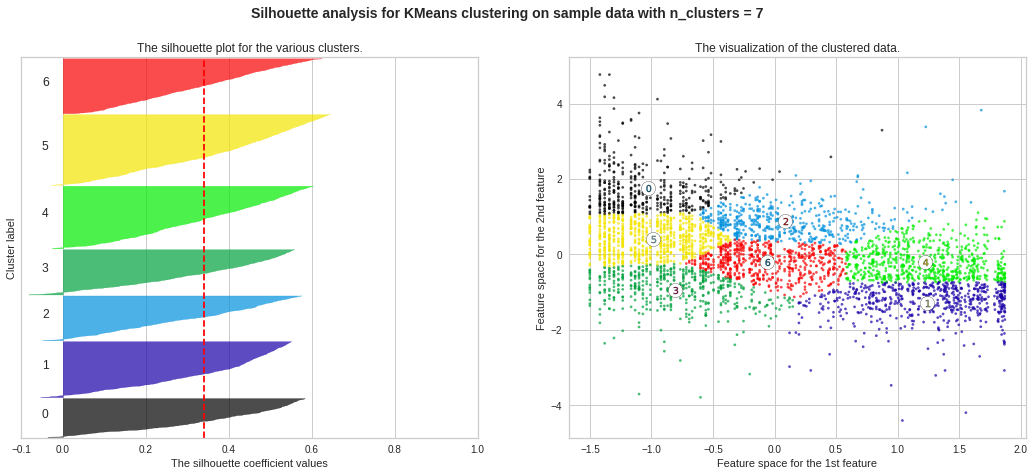

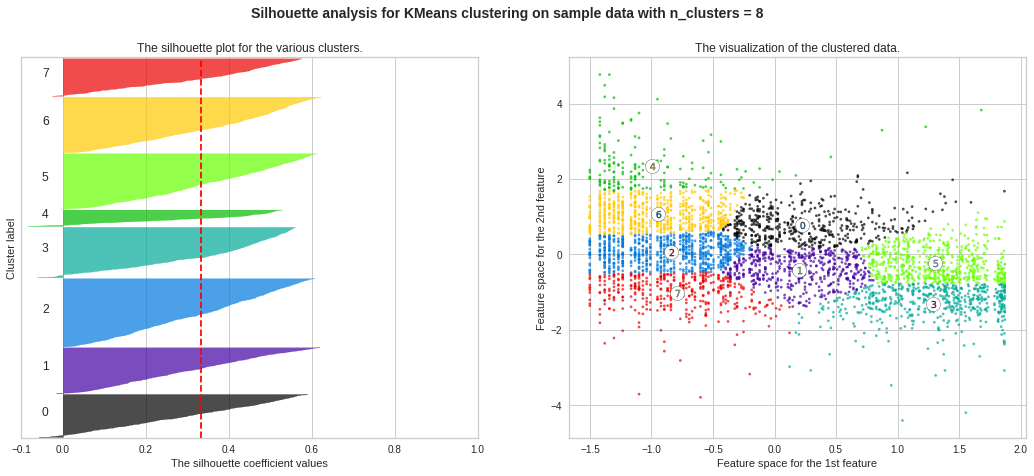

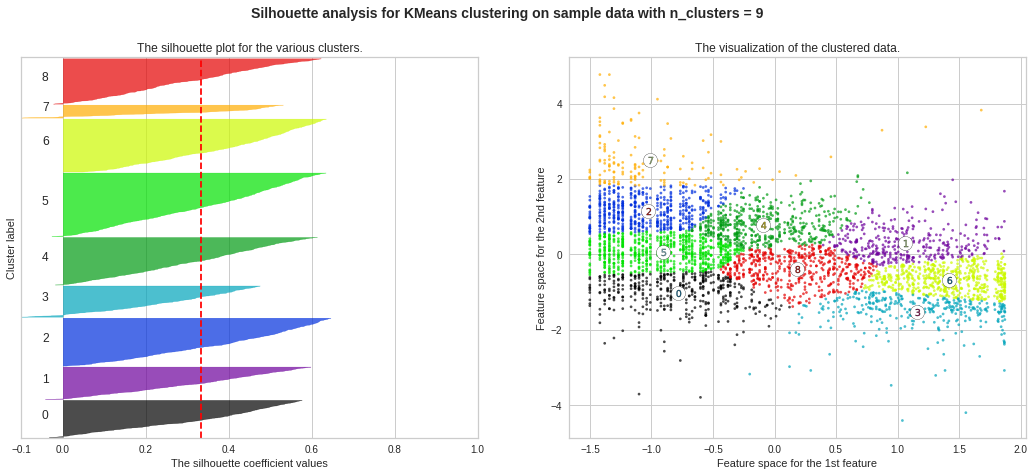

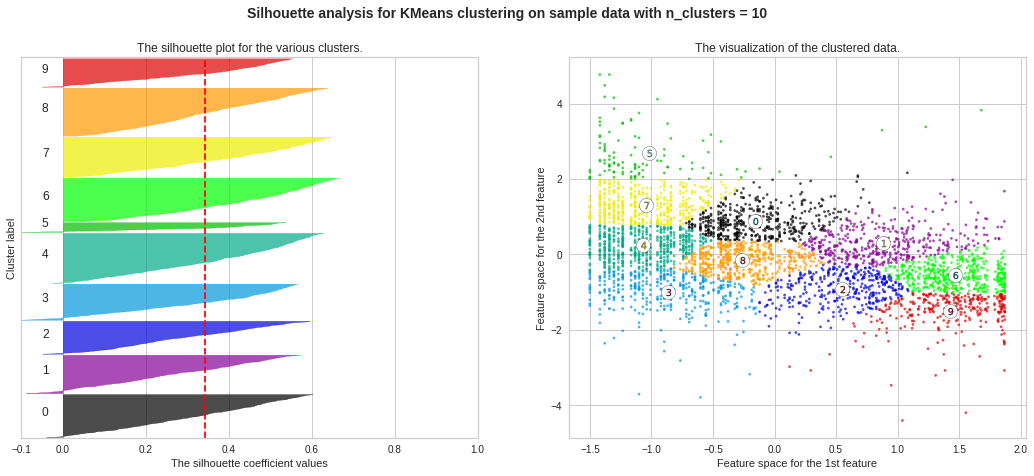

In [ ]:

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


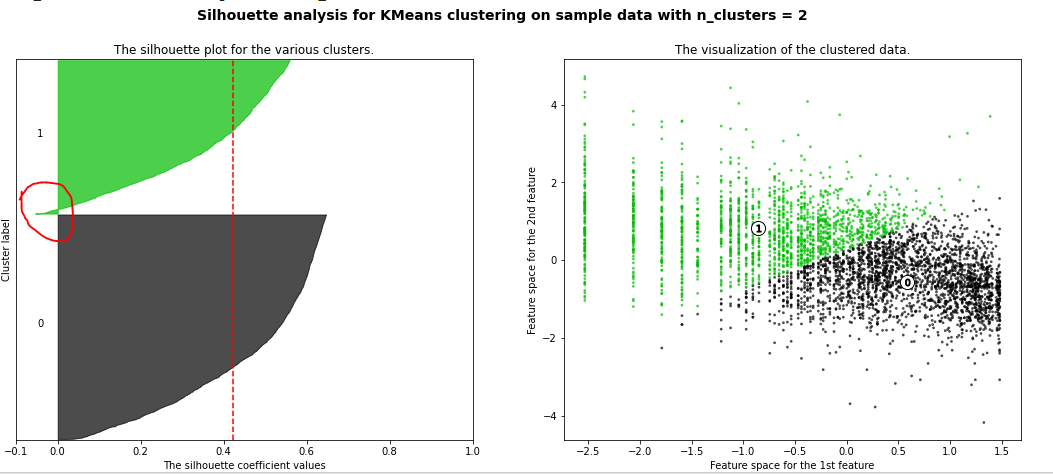


###**So giving n_clusters=2 on Kmeans Model.**

In [ ]:
# applying Kmeans_clustering algorithm
kmeans_rec_mon = KMeans(n_clusters=2)
kmeans_rec_mon.fit(X)
y_kmeans= kmeans_rec_mon.predict(X)

In [ ]:
#Find the clusters for the observation given in the dataset
rfm_dataframe['Cluster_based_rec_mon'] = kmeans_rec_mon.labels_
rfm_dataframe.head(10)

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12346.0         325          1  77183.60  4  4  1       441          9   
12347.0          39        171   4085.18  1  1  1       111          3   
12348.0          75         31   1797.24  2  3  1       231          6   
12350.0         310         17    334.40  4  3  3       433         10   
12352.0          36         85   2506.04  1  2  1       121          4   
12353.0         204          4     89.00  4  4  4       444         12   
12354.0         232         58   1079.40  4  2  2       422          8   
12355.0         214         13    459.40  4  4  3       443         11   
12356.0         245         57   2753.08  4  2  1       421          7   
12358.0         150         12    484.86  3  4  3       343         10   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetary_log  \
CustomerID                                                               
12346.0               Silver     5.783825       0.000000     11.253942   
12347.0            Platinaum     3.663562       5.141664      8.315121   
12348.0                 Gold     4.317488       3.433987      7.494007   
12350.0               Silver     5.736572       2.833213      5.812338   
12352.0            Platinaum     3.583519       4.442651      7.826459   
12353.0                Bronz     5.318120       1.386294      4.488636   
12354.0                 Gold     5.446737       4.060443      6.984161   
12355.0                Bronz     5.365976       2.564949      6.129921   
12356.0                 Gold     5.501258       4.043051      7.920476   
12358.0               Silver     5.010635       2.484907      6.183860   

            Cluster_based_rec_mon  
CustomerID                         
12346.0                         1  
12347.0                         1  
12348.0                         1  
12350.0                         0  
12352.0                         1  
12353.0                         0  
12354.0                         0  
12355.0                         0  
12356.0                         0  
12358.0                         0

In [ ]:
# Centers of the clusters(coordinates)
centers = kmeans_rec_mon.cluster_centers_
centers

array([[ 0.97422082, -0.67391223],
       [-0.69563582,  0.4812025 ]])

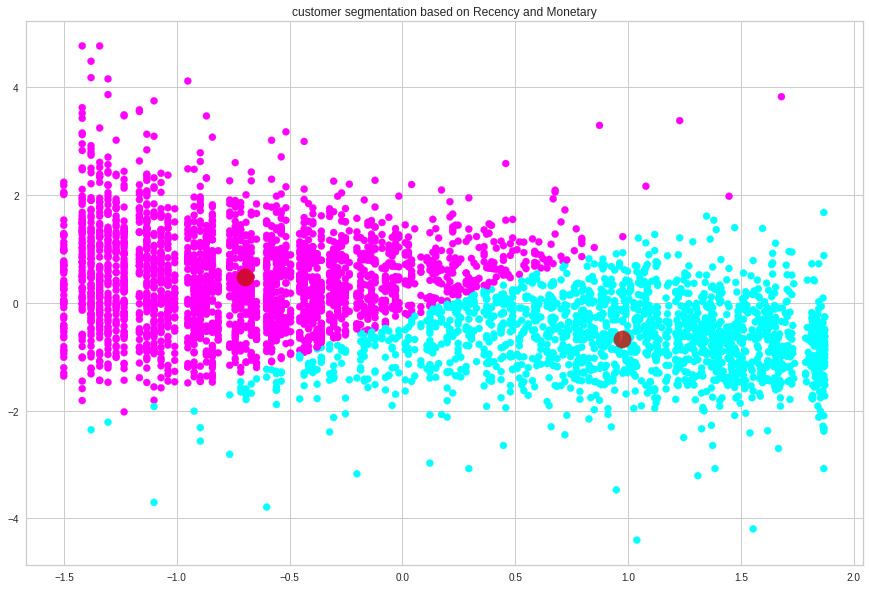

In [ ]:
# ploting visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='cool')

centers = kmeans_rec_mon.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='r', s=300, alpha=0.8)
plt.show()

#   **2) DBSCAN Algorithm on Recency and Monetary**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [ ]:
#eps value is the radius value for the datapoint from which circle is drawn and min sample indicates how many datapoints should be consider to consider that point in cluster.
#codesource(sklearn documentation)
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 1
Estimated number of noise points: 66
Silhouette Coefficient: 0.471


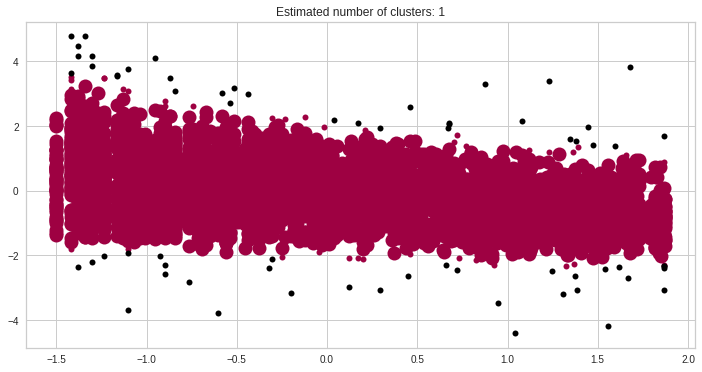

In [ ]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(12,6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k
    

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)

plt.show()

#***Frequency and Monetary***

# **1) K Means Clustering**

**Before implementing the Kmeans Clustering alogorthm we need to decide the number of clusters to put inside algorithm as input. So we will be finding the minmum number of clusters required by using Elbow method.**

##***A)  Applying Elbow Method on Frequency and Monetary.***

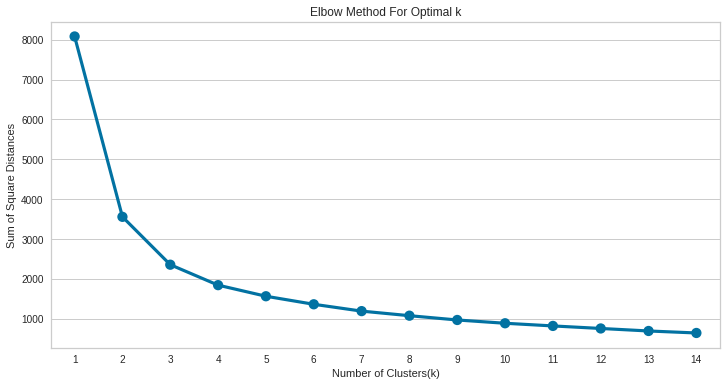

In [ ]:
# taking Recency and Monetory_log in list.
Recency_and_Monetary_feat=['Frequency_log','Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#applying Elbow Method
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_


#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

##**Here we can see that Optimal value for cluster came out to be 2.**

### ***Cross verifying with ElbowVisualizar***

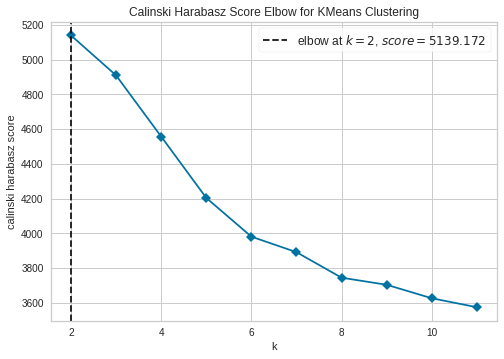

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
plt.show()

Elbow Visulaizer also giving cluster=2

##**Silhouette Score** ***(Validating Above optimal cluster value(i.e optimal_cluster=2)***

In [ ]:
# taking Recency and Monetory_log in list.
Recency_and_Monetary_feat=['Frequency_log','Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.47645620227253893
For n_clusters = 3, silhouette score is 0.40942114878961705
For n_clusters = 4, silhouette score is 0.37180563255018173
For n_clusters = 5, silhouette score is 0.3495416016575252
For n_clusters = 6, silhouette score is 0.36410253619217897
For n_clusters = 7, silhouette score is 0.34629527602468546
For n_clusters = 8, silhouette score is 0.3267600410161475
For n_clusters = 9, silhouette score is 0.34424411655296366
For n_clusters = 10, silhouette score is 0.3559355881863368
For n_clusters = 11, silhouette score is 0.3639619144540053
For n_clusters = 12, silhouette score is 0.35341724939084723
For n_clusters = 13, silhouette score is 0.35841276445894904
For n_clusters = 14, silhouette score is 0.3479484321451988
For n_clusters = 15, silhouette score is 0.3551574515510566


***Here we can see the for n_cluster=2 silhouette score is good as compared to others.(if values is close to 1 means data points are clustered very well to respective clusters and distance of that datapoint is very far from the other cluster.)***

For n_clusters = 2 The average silhouette_score is : 0.47645620227253893
For n_clusters = 3 The average silhouette_score is : 0.40942114878961705
For n_clusters = 4 The average silhouette_score is : 0.37180563255018173
For n_clusters = 5 The average silhouette_score is : 0.3495416016575252
For n_clusters = 6 The average silhouette_score is : 0.36410253619217897
For n_clusters = 7 The average silhouette_score is : 0.34629527602468546
For n_clusters = 8 The average silhouette_score is : 0.3267600410161475
For n_clusters = 9 The average silhouette_score is : 0.34424411655296366
For n_clusters = 10 The average silhouette_score is : 0.3559355881863368


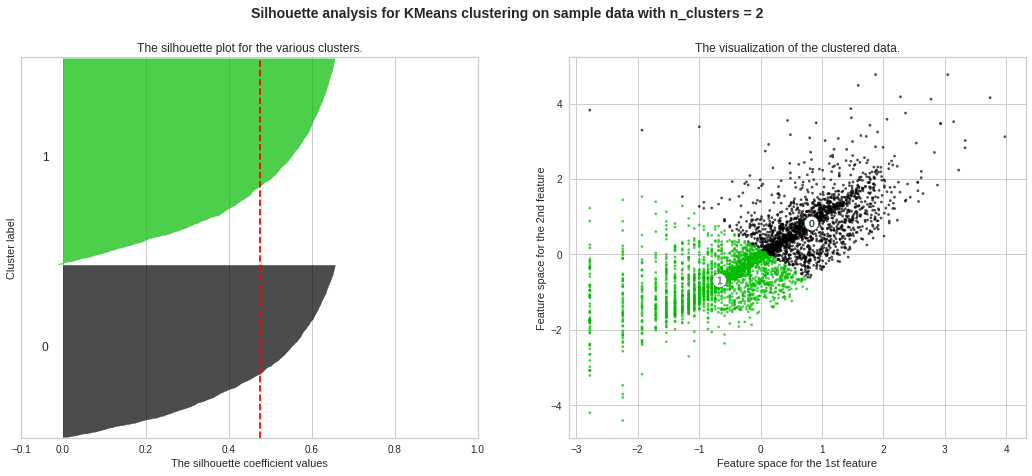

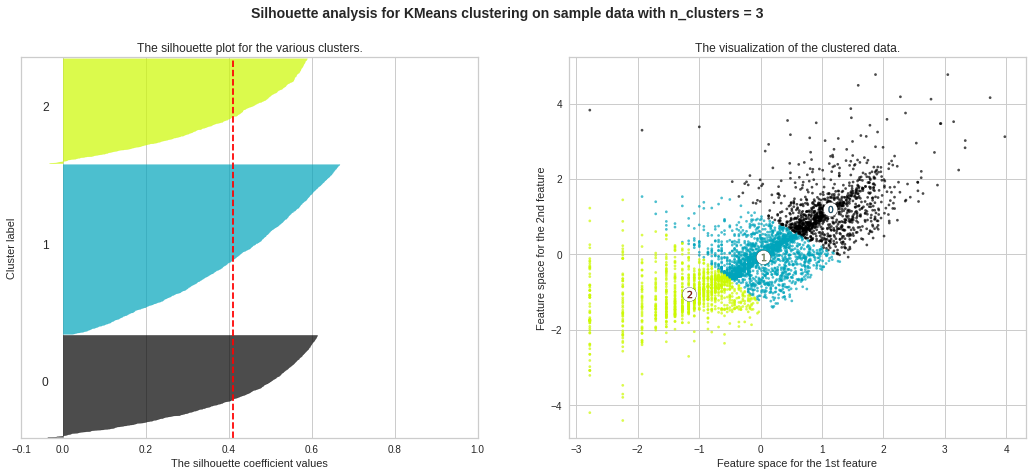

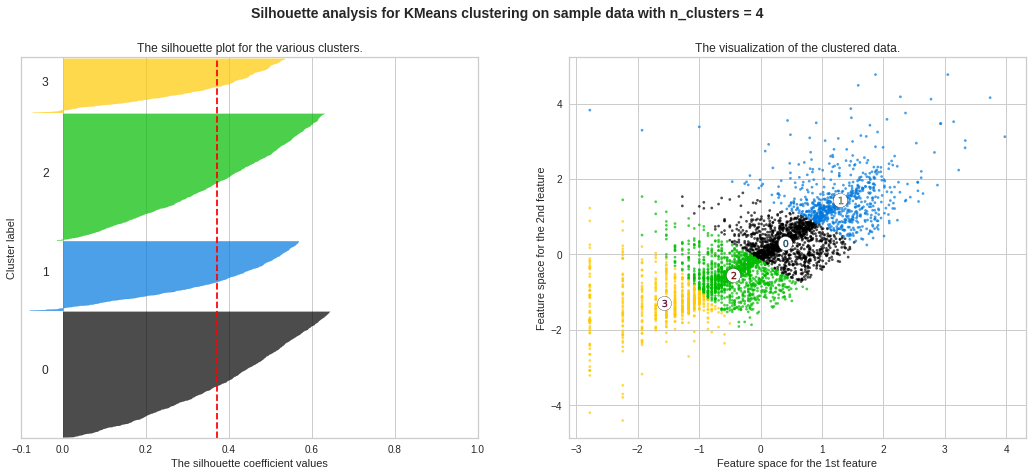

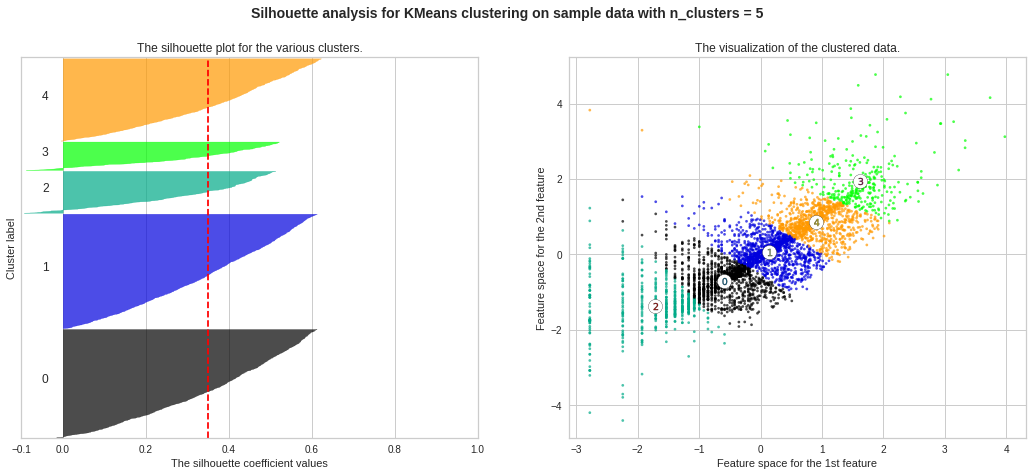

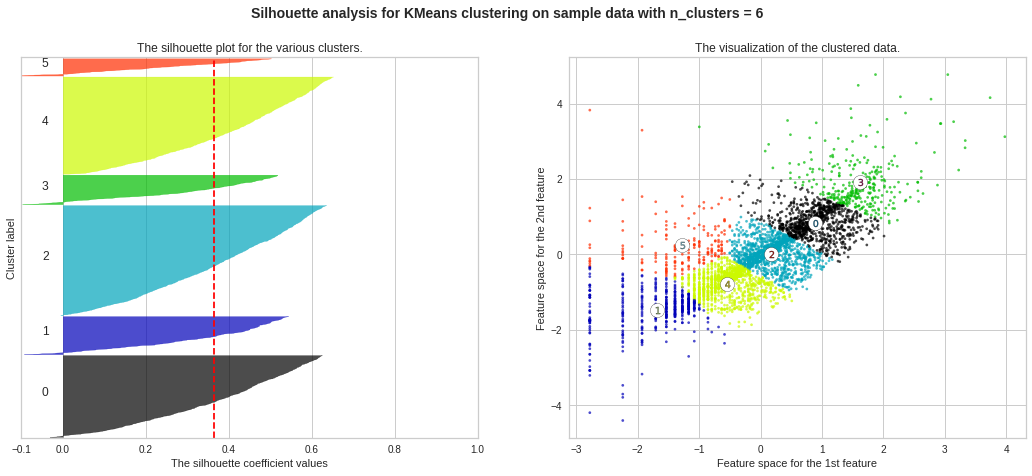

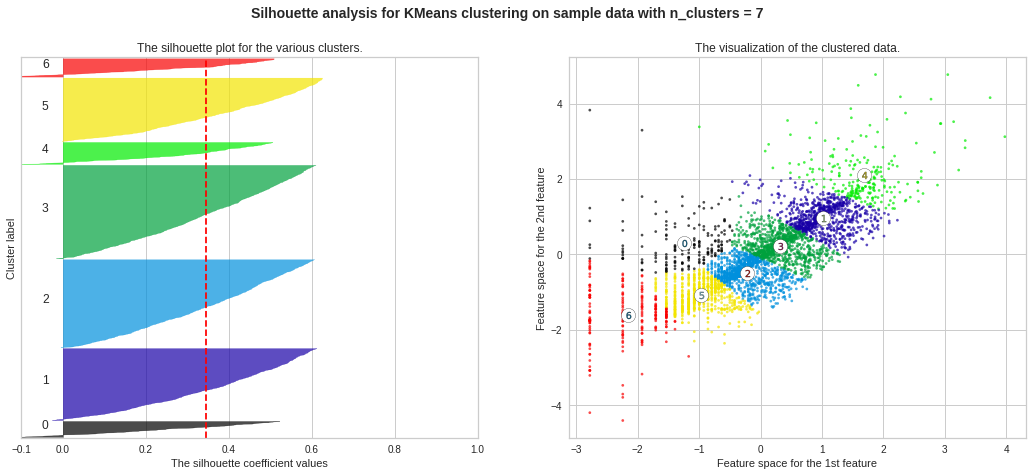

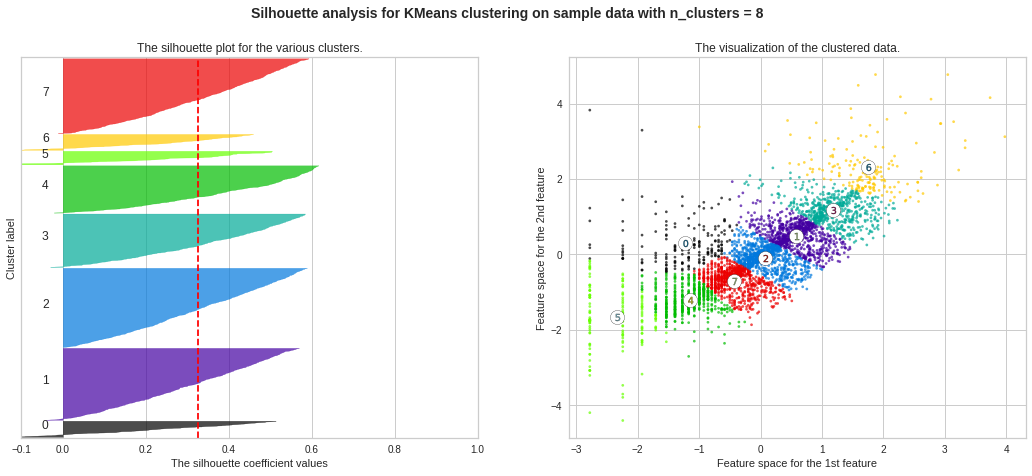

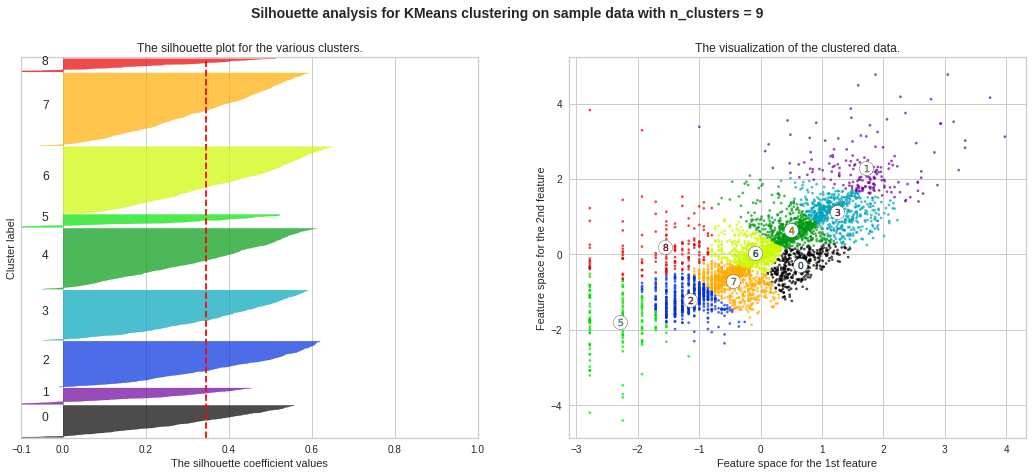

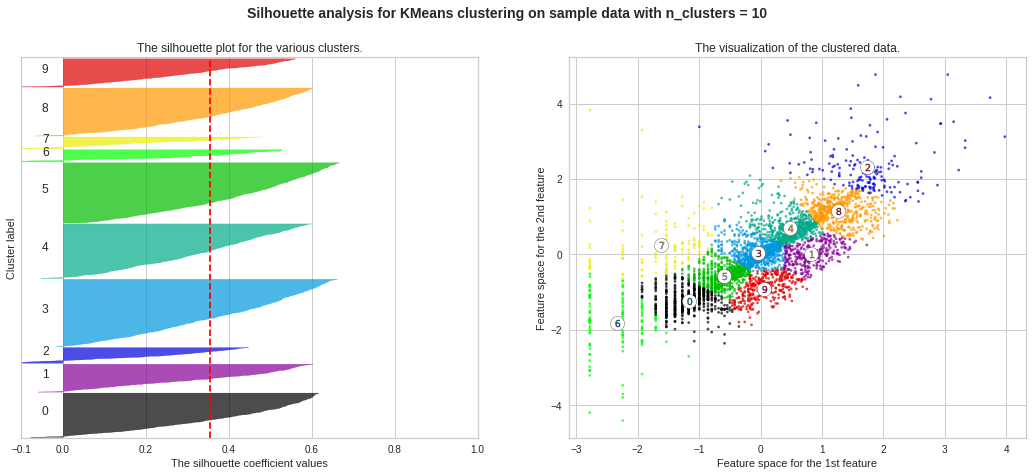

In [ ]:

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


* ***Silhouette Plot for Frequency and Monetary with cluster=2 is very good as compared to Recency and Monetary's Silhouette plot.*** 
* ***No datapoints are on the negative side of the Silhouette Coefficent values(see below image).***

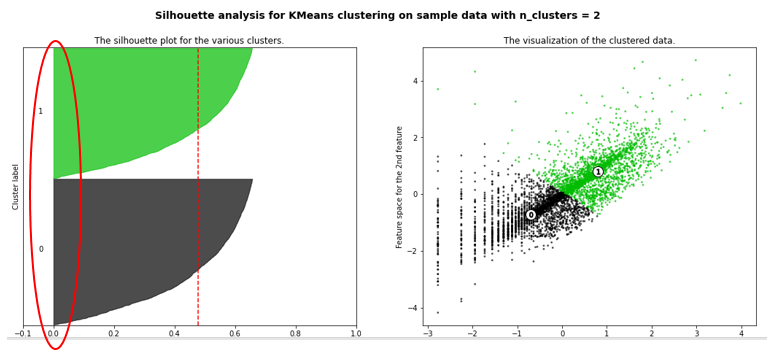

##**So giving n_clusters=2 on Kmeans Model.**

In [ ]:
# applying Kmeans_clustering algorithm
kmeans_freq_mon = KMeans(n_clusters=2)
kmeans_freq_mon.fit(X)
y_kmeans= kmeans_freq_mon.predict(X)

In [ ]:
#Find the clusters for the observation given in the dataset
rfm_dataframe['Cluster_based_on_freq_mon'] = kmeans_freq_mon.labels_
rfm_dataframe.head(10)

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12346.0         325          1  77183.60  4  4  1       441          9   
12347.0          39        171   4085.18  1  1  1       111          3   
12348.0          75         31   1797.24  2  3  1       231          6   
12350.0         310         17    334.40  4  3  3       433         10   
12352.0          36         85   2506.04  1  2  1       121          4   
12353.0         204          4     89.00  4  4  4       444         12   
12354.0         232         58   1079.40  4  2  2       422          8   
12355.0         214         13    459.40  4  4  3       443         11   
12356.0         245         57   2753.08  4  2  1       421          7   
12358.0         150         12    484.86  3  4  3       343         10   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetary_log  \
CustomerID                                                               
12346.0               Silver     5.783825       0.000000     11.253942   
12347.0            Platinaum     3.663562       5.141664      8.315121   
12348.0                 Gold     4.317488       3.433987      7.494007   
12350.0               Silver     5.736572       2.833213      5.812338   
12352.0            Platinaum     3.583519       4.442651      7.826459   
12353.0                Bronz     5.318120       1.386294      4.488636   
12354.0                 Gold     5.446737       4.060443      6.984161   
12355.0                Bronz     5.365976       2.564949      6.129921   
12356.0                 Gold     5.501258       4.043051      7.920476   
12358.0               Silver     5.010635       2.484907      6.183860   

            Cluster_based_rec_mon  Cluster_based_on_freq_mon  
CustomerID                                                    
12346.0                         1                          0  
12347.0                         1                          0  
12348.0                         1                          0  
12350.0                         0                          1  
12352.0                         1                          0  
12353.0                         0                          1  
12354.0                         0                          0  
12355.0                         0                          1  
12356.0                         0                          0  
12358.0                         0                          1

In [ ]:
# Centers of the clusters(coordinates)
centers = kmeans_freq_mon.cluster_centers_
centers

array([[ 0.818216  ,  0.82157164],
       [-0.68159917, -0.68439453]])

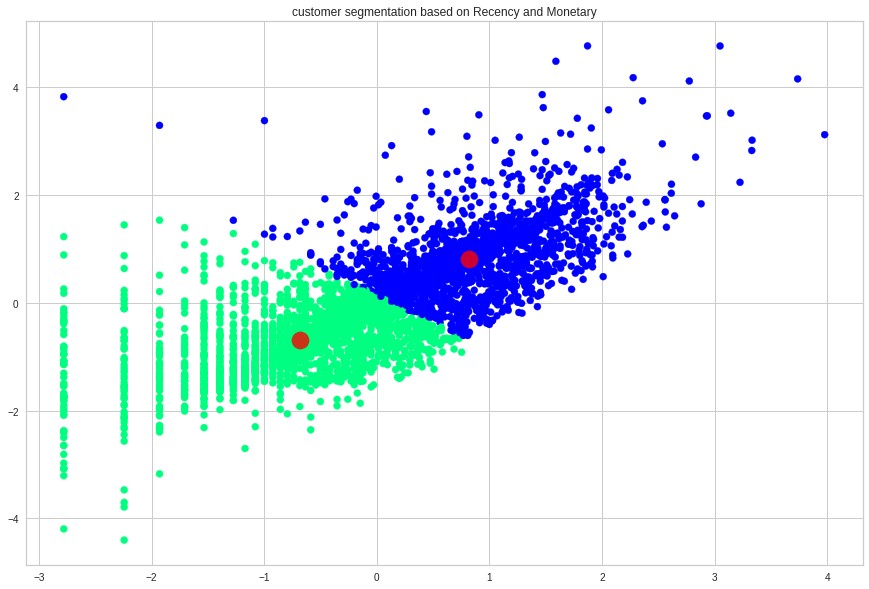

In [ ]:
# ploting visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans_freq_mon.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8)

# **2) DBSCAN Algorithm on Frequency and Monetary**

In [ ]:
#eps value is the radius value for the datapoint from which circle is drwan and min sample indicates how many datapoints should be consider to consider that point in cluster.
#codesource(sklearn documentation)
db = DBSCAN(eps=0.5, min_samples=15).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Estimated number of noise points: 51
Silhouette Coefficient: 0.429


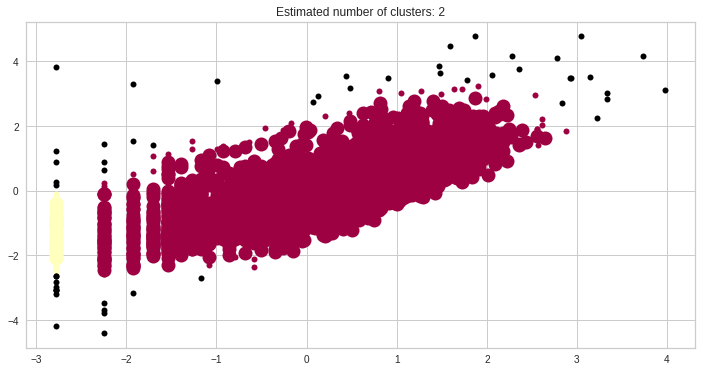

In [ ]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(12,6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k
    

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
    plt.title("Estimated number of clusters: %d" % n_clusters_)

plt.show()

# **Recency,Frequency and Monetary**

# **1) K Means Clustering**

***Before implementing the Kmeans Clustering alogorthm we need to decide the number of clusters to put inside algorithm as input. So we will be finding the minmum number of clusters required by using Elbow method.***

#***A) Applying Elbow Method on Recency, Frequency and Monetary.***

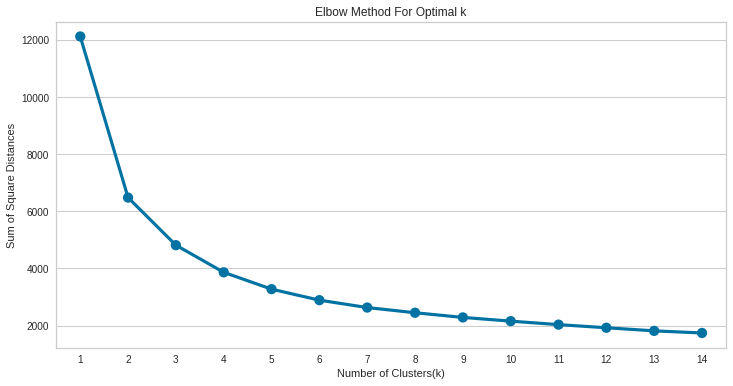

In [ ]:
# taking Recency_log, Frequency_log and Monetory_log in list.
Recency_and_Monetary_feat=['Recency_log','Frequency_log','Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#applying Elbow Method
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_


#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# **Here we can see that Optimal value for cluster came out to be 2.**

### ***Cross verifying with ElbowVisualizar***

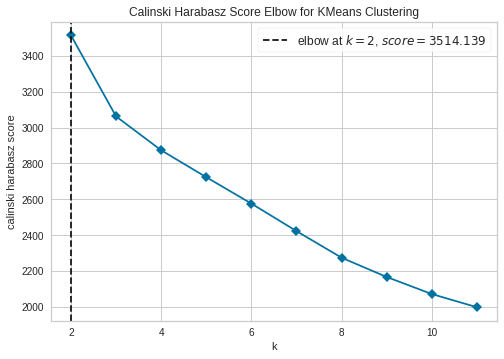

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
plt.show()

Elbow Visulaizer also giving cluster=2

# **Silhouette Score (Validating Above optimal cluster value(i.e optimal_cluster=2)**

In [ ]:
# taking Recency_log,Frequency_log and Monetory_log in list.
Recency_and_Monetary_feat=['Recency_log','Frequency_log','Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.39043100822902255
For n_clusters = 3, silhouette score is 0.33685057953171704
For n_clusters = 4, silhouette score is 0.33079752897082904
For n_clusters = 5, silhouette score is 0.30092733222178825
For n_clusters = 6, silhouette score is 0.29350429943348016
For n_clusters = 7, silhouette score is 0.27605130275473916
For n_clusters = 8, silhouette score is 0.2630062992715357
For n_clusters = 9, silhouette score is 0.25639161668469773
For n_clusters = 10, silhouette score is 0.24831700675430476
For n_clusters = 11, silhouette score is 0.25069102162212054
For n_clusters = 12, silhouette score is 0.25507877316307714
For n_clusters = 13, silhouette score is 0.2529856637751631
For n_clusters = 14, silhouette score is 0.24659970848131121
For n_clusters = 15, silhouette score is 0.24574109021296692


***Here we can see the for n_cluster=2 silhouette score is good as compared to others.(if values is close to 1 means data points are clustered very well to respective clusters and distance of that datapoint is very far from the other cluster.)***

For n_clusters = 2 The average silhouette_score is : 0.39043100822902255
For n_clusters = 3 The average silhouette_score is : 0.33685057953171704
For n_clusters = 4 The average silhouette_score is : 0.33079752897082904
For n_clusters = 5 The average silhouette_score is : 0.30092733222178825
For n_clusters = 6 The average silhouette_score is : 0.29350429943348016
For n_clusters = 7 The average silhouette_score is : 0.27605130275473916
For n_clusters = 8 The average silhouette_score is : 0.2630062992715357
For n_clusters = 9 The average silhouette_score is : 0.25639161668469773
For n_clusters = 10 The average silhouette_score is : 0.24831700675430476


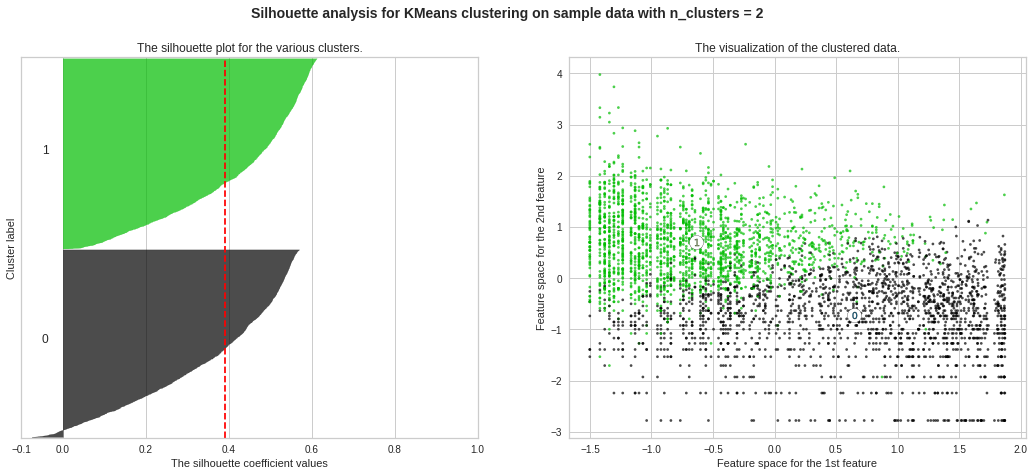

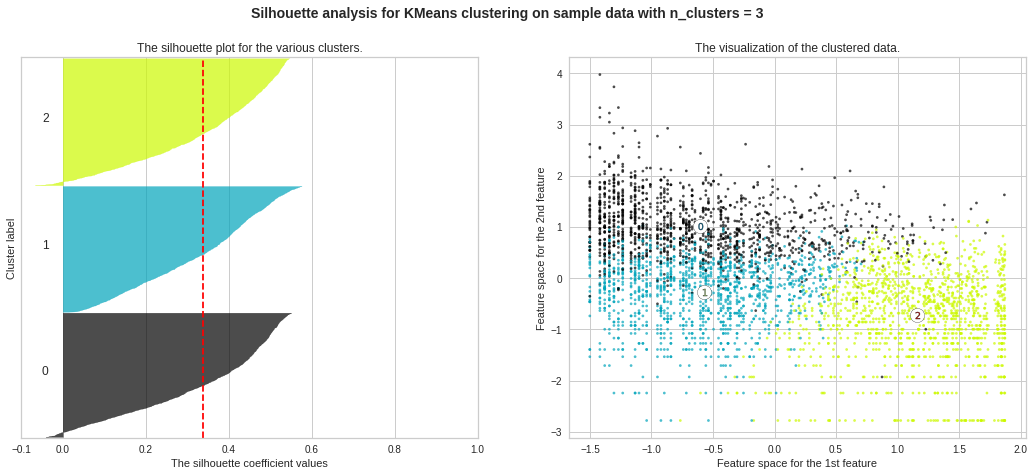

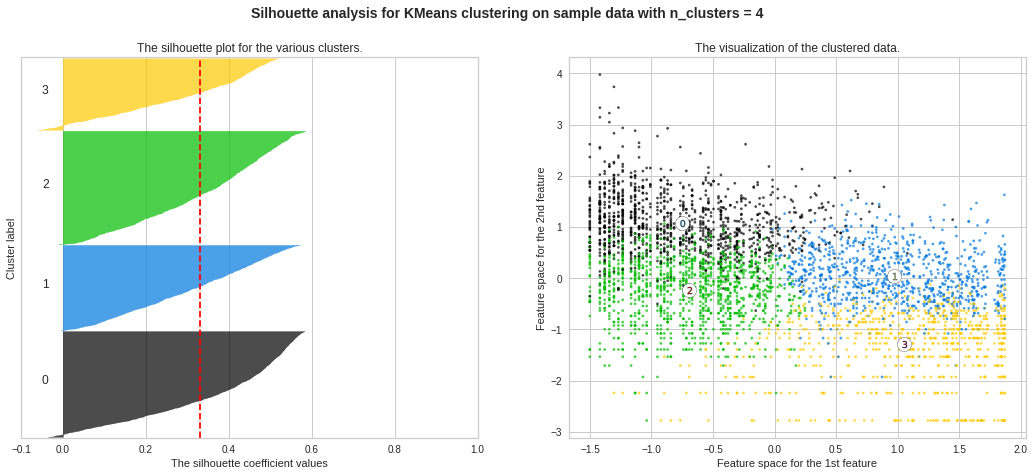

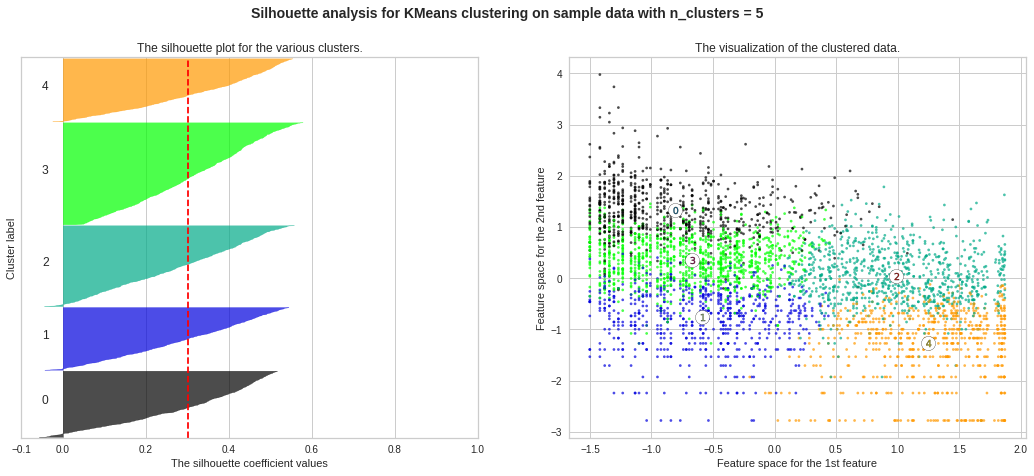

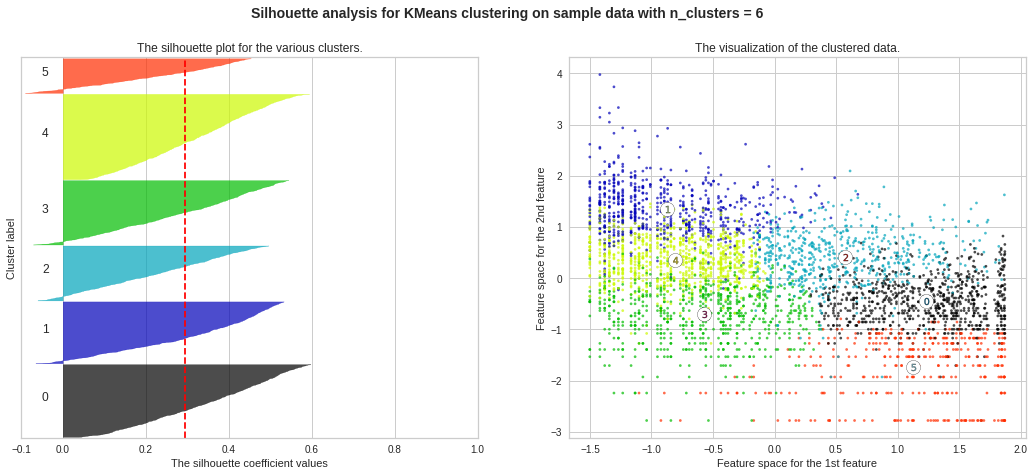

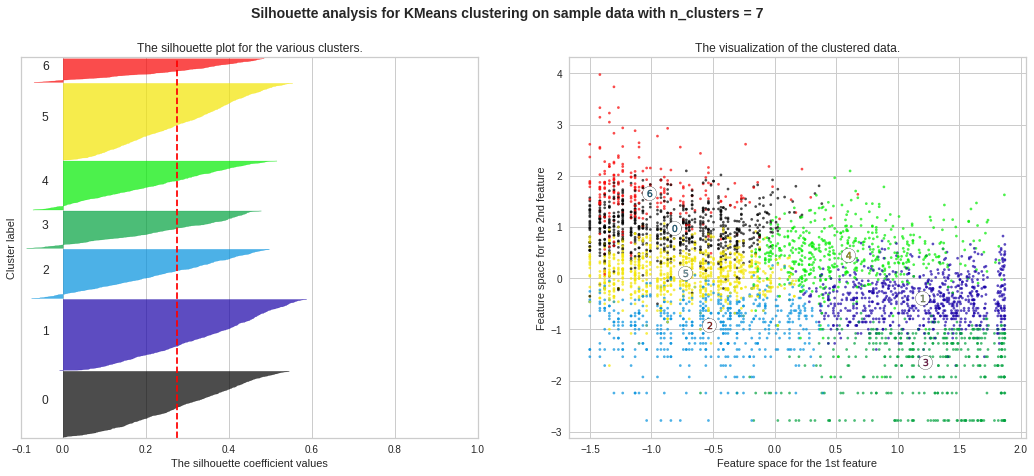

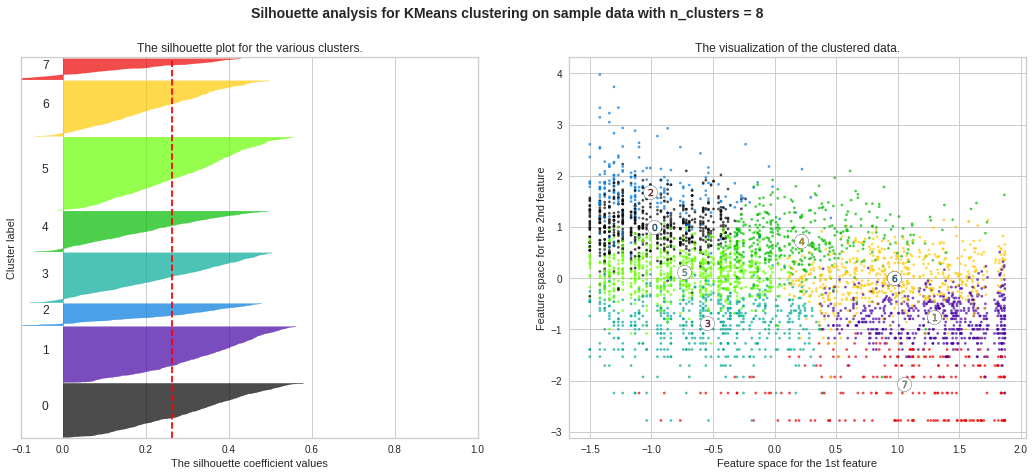

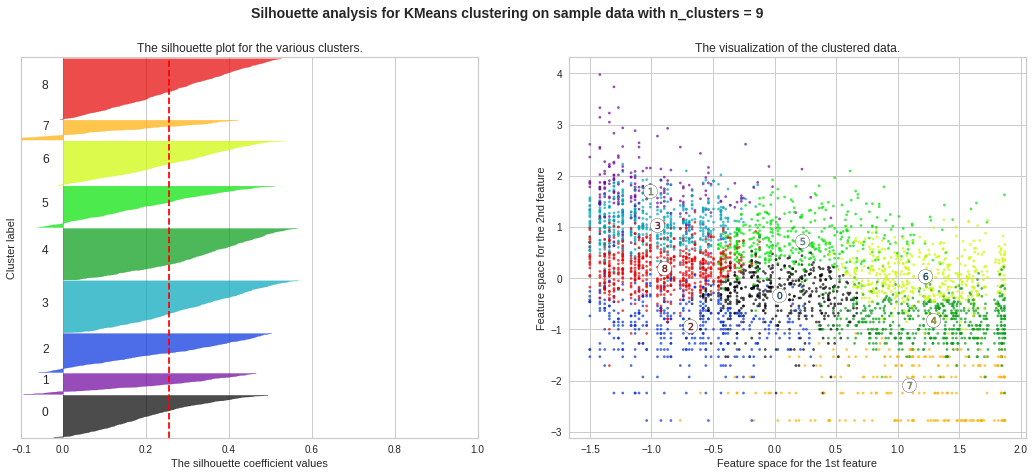

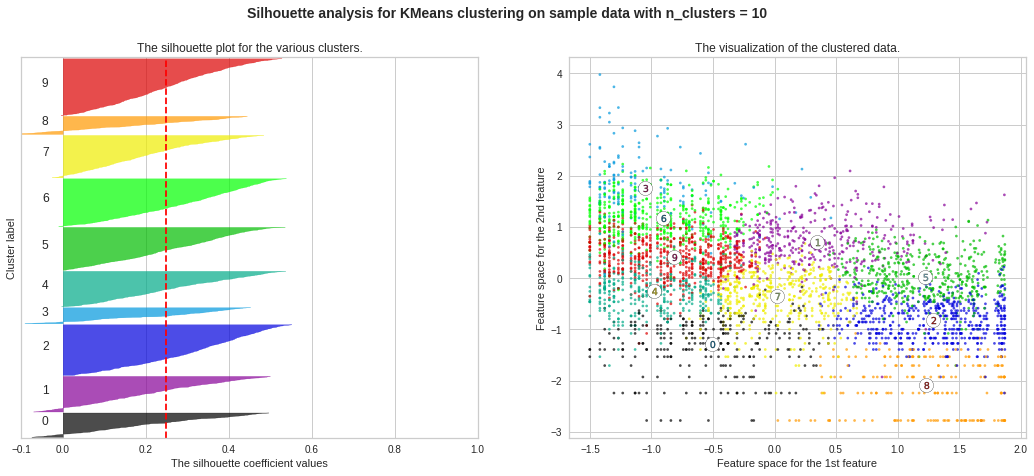

In [ ]:

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


* ***Silhouette Plot for Frequency and Monetary with cluster=2 is good.***
* ***Still Few datapoints are on the negative side of the Silhouette Coefficent values(see below image). Still we can consider the clusters***


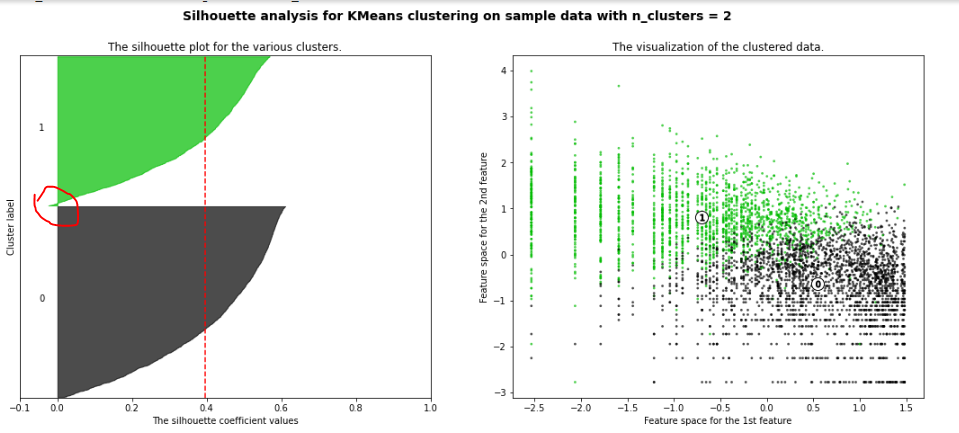

# **So giving n_clusters=2 on Kmeans Model.**

In [ ]:
# applying Kmeans_clustering algorithm
kmeans_freq_mon_rec = KMeans(n_clusters=2)
kmeans_freq_mon_rec.fit(X)
y_kmeans= kmeans_freq_mon_rec.predict(X)

In [ ]:
#Find the clusters for the observation given in the dataset
rfm_dataframe['Cluster_based_on_freq_mon_rec'] = kmeans_freq_mon_rec.labels_
rfm_dataframe.head(10)

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12346.0         325          1  77183.60  4  4  1       441          9   
12347.0          39        171   4085.18  1  1  1       111          3   
12348.0          75         31   1797.24  2  3  1       231          6   
12350.0         310         17    334.40  4  3  3       433         10   
12352.0          36         85   2506.04  1  2  1       121          4   
12353.0         204          4     89.00  4  4  4       444         12   
12354.0         232         58   1079.40  4  2  2       422          8   
12355.0         214         13    459.40  4  4  3       443         11   
12356.0         245         57   2753.08  4  2  1       421          7   
12358.0         150         12    484.86  3  4  3       343         10   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetary_log  \
CustomerID                                                               
12346.0               Silver     5.783825       0.000000     11.253942   
12347.0            Platinaum     3.663562       5.141664      8.315121   
12348.0                 Gold     4.317488       3.433987      7.494007   
12350.0               Silver     5.736572       2.833213      5.812338   
12352.0            Platinaum     3.583519       4.442651      7.826459   
12353.0                Bronz     5.318120       1.386294      4.488636   
12354.0                 Gold     5.446737       4.060443      6.984161   
12355.0                Bronz     5.365976       2.564949      6.129921   
12356.0                 Gold     5.501258       4.043051      7.920476   
12358.0               Silver     5.010635       2.484907      6.183860   

            Cluster_based_rec_mon  Cluster_based_on_freq_mon  \
CustomerID                                                     
12346.0                         1                          0   
12347.0                         1                          0   
12348.0                         1                          0   
12350.0                         0                          1   
12352.0                         1                          0   
12353.0                         0                          1   
12354.0                         0                          0   
12355.0                         0                          1   
12356.0                         0                          0   
12358.0                         0                          1   

            Cluster_based_on_freq_mon_rec  
CustomerID                                 
12346.0                                 0  
12347.0                                 1  
12348.0                                 1  
12350.0                                 0  
12352.0                                 1  
12353.0                                 0  
12354.0                                 0  
12355.0                                 0  
12356.0                                 1  
12358.0                                 0

In [ ]:
# Centers of the clusters(coordinates)
centers = kmeans_freq_mon_rec.cluster_centers_
centers

array([[ 0.65324193, -0.71395606, -0.70318544],
       [-0.63727025,  0.69649992,  0.68599265]])

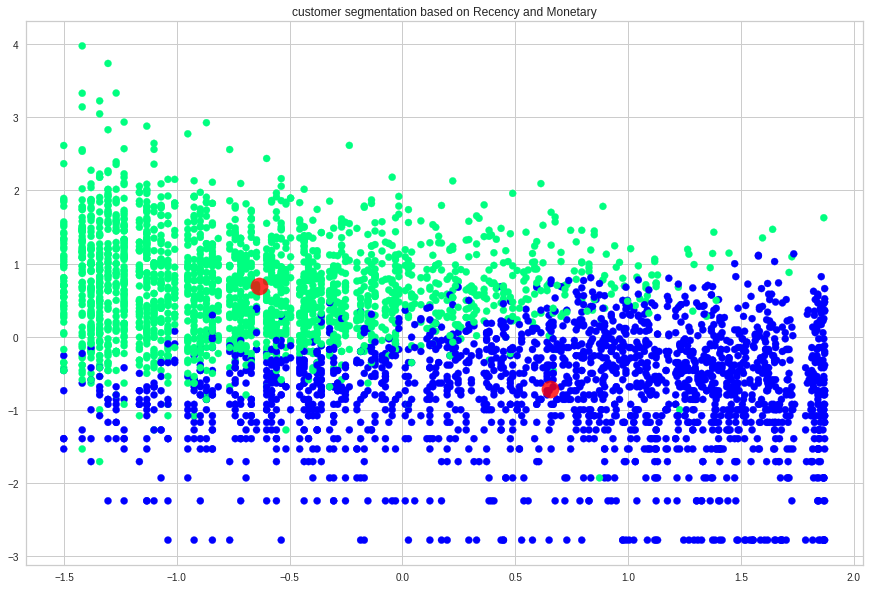

In [ ]:
# ploting visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans_freq_mon_rec.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8)
plt.show()

# **2) DBSCAN Algorithm on Recency,Frequency and Monetary**

In [ ]:
#eps value is the radius value for the datapoint from which circle is drwan and min sample indicates how many datapoints should be consider to consider that point in cluster.
#codesource(sklearn documentation)
db = DBSCAN(eps=0.5, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Estimated number of noise points: 133
Silhouette Coefficient: 0.293


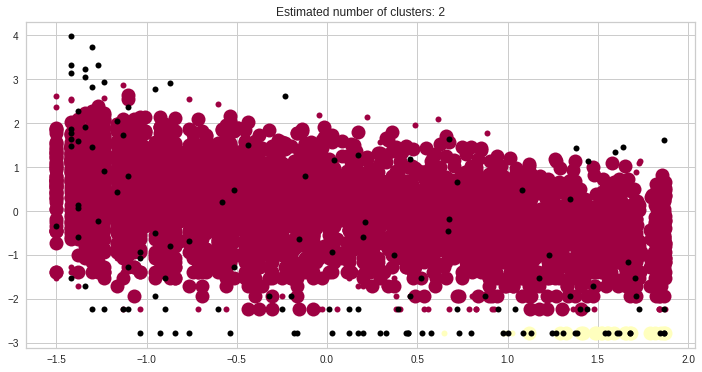

In [ ]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(12,6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k
    

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)

plt.show()


# **Hierarchical Clustering**

## <b> How should we Choose the Number of Clusters in Hierarchical Clustering? </b>

### A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters. 

### We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line. Find largest vertical distance we can make without crossing any other horizontal line). 

In [ ]:
import scipy.cluster.hierarchy as sch

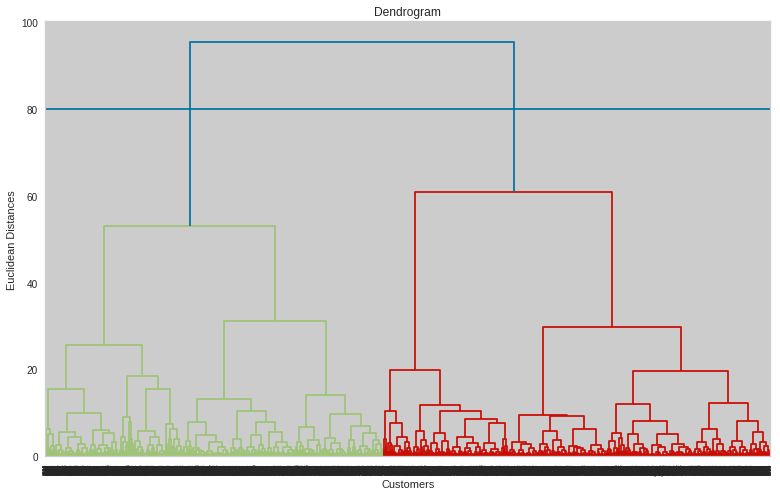

In [ ]:
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=80, color='b', linestyle='-')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

### <b> The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold. </b>

### No. of Cluster  = 2

In [ ]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
h_clustering = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = h_clustering.fit_predict(X)

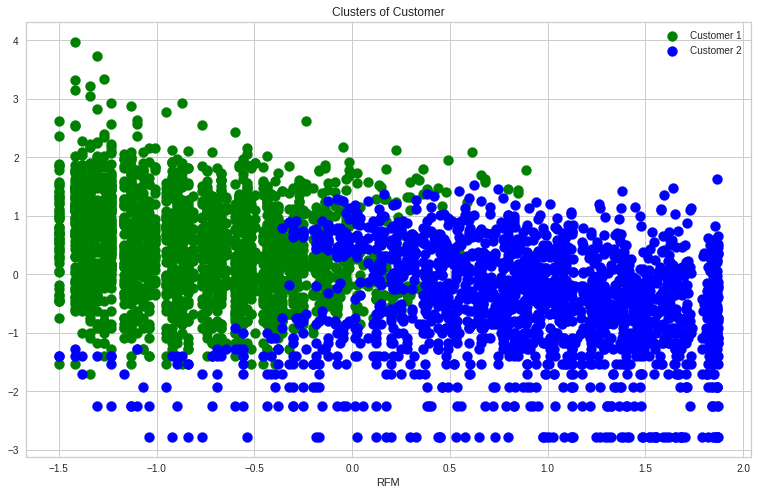

In [ ]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'green', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'red', label = 'Target')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.legend()
plt.show()

In [ ]:
rfm_dataframe.head(1)

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12346.0         325          1   77183.6  4  4  1       441          9   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetary_log  \
CustomerID                                                               
12346.0               Silver     5.783825            0.0     11.253942   

            Cluster_based_rec_mon  Cluster_based_on_freq_mon  \
CustomerID                                                     
12346.0                         1                          0   

            Cluster_based_on_freq_mon_rec  
CustomerID                                 
12346.0                                 0

In [ ]:
data_process_normalized=rfm_dataframe[['Recency','Frequency','Monetary','Recency_log','Frequency_log','Monetary_log','RFM_Loyalty_Level','Cluster_based_on_freq_mon_rec']]

In [ ]:
data_process_normalized.groupby('Cluster_based_on_freq_mon_rec').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max','count']
})

Recency            Frequency            \
                                     mean min  max        mean min   max   
Cluster_based_on_freq_mon_rec                                              
0                              184.879379  33  373   21.243243   1   157   
1                               68.961802  33  372  138.975024   3  6179   

                                  Monetary                           
                                      mean     min        max count  
Cluster_based_on_freq_mon_rec                                        
0                               418.050046    2.90   77183.60  1998  
1                              3235.585672  155.37  247885.68  2042

# **Summary And Conclusion of Project**

* ### ***Firstly we did clustering based on RFM analysis. We had 4 clusters/Segmentation of customers based on RFM score.***
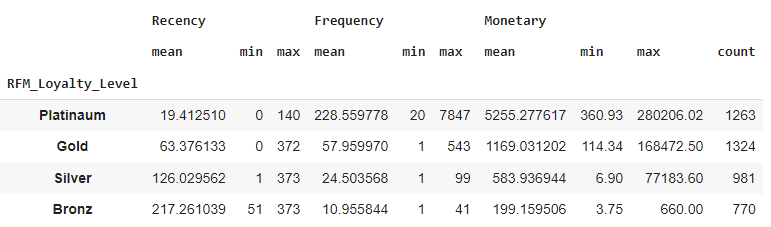

  * Platinum customers=1263 ( less recency but high  frequency and heavy spendings)
  * Gold customers=1324 (good recency,frequncy and moentary)
  * Silver customers=981(high recency, low frequency and low spendings)
  * Bronz customers=770 (very high recency but very less frequency and spendings)

* ### ***Later we implemented the machine learning algorithms to cluster the customers.***

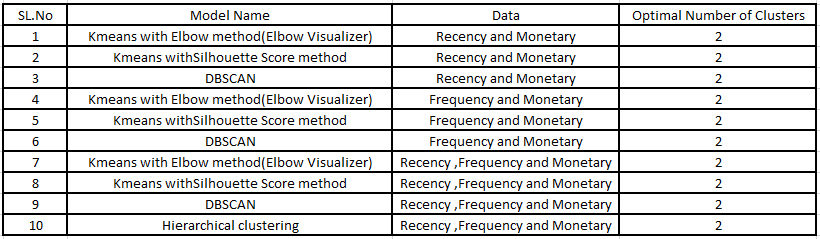

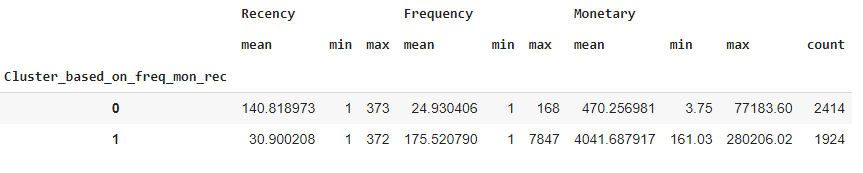

* ***Above clustering is done with recency,frequency and monetary data(Kmeans Clustering) as all 3 together will provide more information.***

* ***Cluster 0 has high recency rate but very low frequency and monetary. Cluster 0 conatins 2414 customers.***
* ***Cluster 1 has low recency rate but they are frequent buyers and spends  very high money than other customers as mean monetary value is very high.Thus generates more revnue to the retail business***


***With this, we are done.Also, we can use more robust analysis for the clustering, using not only RFM but other metrics such as demographics or product features.***